The datasets below contain internal and external information that are available for each client. They provide a view into the financial history of consumers, historical loan application, their demographics and their loan repayment habits. </br>

The goal is to train a machine learning algorithm that predicts which consumers qualify for loans. 
This is a multiclass classification problem as we are trying to bin each consumer into a bucket, where each bucket is a label reflecting the risk associated with approving an applicant's loan

# Understanding the data:

1a. Check the size of the dataset. Both in terms of the numbers of rows and columns and also memory usage </br>
1b. Check for missing data and decide how to handle missing values </br>
1c. Check data types and ensure that the columns have the appropriate data type. Also check that the values wihtin each column align with the expected range of values in that column </br>
1d. Generate summary statistics (e.g., mean, median, standard deviation) to understand the distribution of the data</br>
1e. Examine the distribution of the target variable

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from scipy.stats.mstats import winsorize

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
internal= pd.read_excel('data/case_study1.xlsx')

In [3]:
external= pd.read_excel('data/case_study2.xlsx')

In [4]:
df1= internal.copy()
df2= external.copy()

In [5]:
df1.head()
df1.tail()

PROSPECTID  Total_TL  Tot_Closed_TL  Tot_Active_TL  Total_TL_opened_L6M  \
0           1         5              4              1                    0   
1           2         1              0              1                    0   
2           3         8              0              8                    1   
3           4         1              0              1                    1   
4           5         3              2              1                    0   

   Tot_TL_closed_L6M  pct_tl_open_L6M  pct_tl_closed_L6M  pct_active_tl  \
0                  0            0.000                0.0          0.200   
1                  0            0.000                0.0          1.000   
2                  0            0.125                0.0          1.000   
3                  0            1.000                0.0          1.000   
4                  0            0.000                0.0          0.333   

   pct_closed_tl  Total_TL_opened_L12M  Tot_TL_closed_L12M  pct_tl_open_L12M  \
0          0.800                     0                   0              0.00   
1          0.000                     1                   0              1.00   
2          0.000                     2                   0              0.25   
3          0.000                     1                   0              1.00   
4          0.667                     0                   0              0.00   

   pct_tl_closed_L12M  Tot_Missed_Pmnt  Auto_TL  CC_TL  Consumer_TL  Gold_TL  \
0                 0.0                0        0      0            0        1   
1                 0.0                0        0      0            1        0   
2                 0.0                1        1      0            6        1   
3                 0.0                1        0      0            0        0   
4                 0.0                0        1      0            0        0   

   Home_TL  PL_TL  Secured_TL  Unsecured_TL  Other_TL  Age_Oldest_TL  \
0        0      4           1             4         0             72   
1        0      0           0             1         0              7   
2        0      0           2             6         0             47   
3        0      0           0             1         1              5   
4        0      0           3             0         2            131   

   Age_Newest_TL  
0             18  
1              7  
2              2  
3              5  
4             32

PROSPECTID  Total_TL  Tot_Closed_TL  Tot_Active_TL  \
51331       51332         3              0              3   
51332       51333         4              2              2   
51333       51334         2              1              1   
51334       51335         2              1              1   
51335       51336         1              0              1   

       Total_TL_opened_L6M  Tot_TL_closed_L6M  pct_tl_open_L6M  \
51331                    1                  0            0.333   
51332                    0                  1            0.000   
51333                    1                  1            0.500   
51334                    0                  0            0.000   
51335                    0                  0            0.000   

       pct_tl_closed_L6M  pct_active_tl  pct_closed_tl  Total_TL_opened_L12M  \
51331               0.00            1.0            0.0                     1   
51332               0.25            0.5            0.5                     2   
51333               0.50            0.5            0.5                     2   
51334               0.00            0.5            0.5                     1   
51335               0.00            1.0            0.0                     0   

       Tot_TL_closed_L12M  pct_tl_open_L12M  pct_tl_closed_L12M  \
51331                   0             0.333                0.00   
51332                   1             0.500                0.25   
51333                   1             1.000                0.50   
51334                   1             0.500                0.50   
51335                   0             0.000                0.00   

       Tot_Missed_Pmnt  Auto_TL  CC_TL  Consumer_TL  Gold_TL  Home_TL  PL_TL  \
51331                0        0      0            2        0        0      0   
51332                0        2      0            2        0        0      0   
51333                0        0      0            2        0        0      0   
51334                0        0      0            2        0        0      0   
51335                0        1      0            0        0        0      0   

       Secured_TL  Unsecured_TL  Other_TL  Age_Oldest_TL  Age_Newest_TL  
51331           0             3         1             24              5  
51332           2             2         0             74              7  
51333           0             2         0              9              5  
51334           0             2         0             15              8  
51335           1             0         0             20             20

In [6]:
df2.head()
df2.tail()

PROSPECTID  time_since_recent_payment  time_since_first_deliquency  \
0           1                        549                           35   
1           2                         47                       -99999   
2           3                        302                           11   
3           4                     -99999                       -99999   
4           5                        583                       -99999   

   time_since_recent_deliquency  num_times_delinquent  max_delinquency_level  \
0                            15                    11                     29   
1                        -99999                     0                 -99999   
2                             3                     9                     25   
3                        -99999                     0                 -99999   
4                        -99999                     0                 -99999   

   max_recent_level_of_deliq  num_deliq_6mts  num_deliq_12mts  \
0                         29               0                0   
1                          0               0                0   
2                         25               1                9   
3                          0               0                0   
4                          0               0                0   

   num_deliq_6_12mts  max_deliq_6mts  max_deliq_12mts  num_times_30p_dpd  \
0                  0          -99999           -99999                  0   
1                  0               0                0                  0   
2                  8              25               25                  0   
3                  0          -99999           -99999                  0   
4                  0          -99999           -99999                  0   

   num_times_60p_dpd  num_std  num_std_6mts  num_std_12mts  num_sub  \
0                  0       21             5             11        0   
1                  0        0             0              0        0   
2                  0       10             5             10        0   
3                  0        5             4              5        0   
4                  0       53             4             16        0   

   num_sub_6mts  num_sub_12mts  num_dbt  num_dbt_6mts  num_dbt_12mts  num_lss  \
0             0              0        0             0              0        0   
1             0              0        0             0              0        0   
2             0              0        0             0              0        0   
3             0              0        0             0              0        0   
4             0              0        0             0              0        0   

   num_lss_6mts  num_lss_12mts  recent_level_of_deliq  tot_enq  CC_enq  \
0             0              0                     29        6       0   
1             0              0                      0        1       0   
2             0              0                     25        4       0   
3             0              0                      0   -99999  -99999   
4             0              0                      0        1       0   

   CC_enq_L6m  CC_enq_L12m  PL_enq  PL_enq_L6m  PL_enq_L12m  \
0           0            0       6           0            0   
1           0            0       0           0            0   
2           0            0       0           0            0   
3      -99999       -99999  -99999      -99999       -99999   
4           0            0       0           0            0   

   time_since_recent_enq  enq_L12m  enq_L6m  enq_L3m MARITALSTATUS  \
0                    566         0        0        0       Married   
1                    209         1        0        0        Single   
2                    587         0        0        0       Married   
3                 -99999    -99999   -99999   -99999       Married   
4                   3951         0        0        0       Married   

       EDUCATION  AGE GENDER  NETMONTHLYINCOME  Time_With_Curr_Empr  \
0    

PROSPECTID  time_since_recent_payment  time_since_first_deliquency  \
51331       51332                         15                           24   
51332       51333                         57                       -99999   
51333       51334                         32                       -99999   
51334       51335                         58                       -99999   
51335       51336                         74                       -99999   

       time_since_recent_deliquency  num_times_delinquent  \
51331                            23                     2   
51332                        -99999                     0   
51333                        -99999                     0   
51334                        -99999                     0   
51335                        -99999                     0   

       max_delinquency_level  max_recent_level_of_deliq  num_deliq_6mts  \
51331                     24                         24               0   
51332                 -99999                          0               0   
51333                 -99999                          0               0   
51334                 -99999                          0               0   
51335                 -99999                          0               0   

       num_deliq_12mts  num_deliq_6_12mts  max_deliq_6mts  max_deliq_12mts  \
51331                0                  0               0                0   
51332                0                  0               0                0   
51333                0                  0               0                0   
51334                0                  0               0                0   
51335                0                  0          -99999           -99999   

       num_times_30p_dpd  num_times_60p_dpd  num_std  num_std_6mts  \
51331                  0                  0        0             0   
51332                  0                  0        6             4   
51333                  0                  0        0             0   
51334                  0                  0        0             0   
51335                  0                  0       18             4   

       num_std_12mts  num_sub  num_sub_6mts  num_sub_12mts  num_dbt  \
51331              0        0             0              0        0   
51332              6        0             0              0        0   
51333              0        0             0              0        0   
51334              0        0             0              0        0   
51335             10        0             0              0        0   

       num_dbt_6mts  num_dbt_12mts  num_lss  num_lss_6mts  num_lss_12mts  \
51331             0              0        0             0              0   
51332             0              0        0             0              0   
51333             0              0        0             0              0   
51334             0              0        0             0              0   
51335             0              0        0             0              0   

       recent_level_of_deliq  tot_enq  CC_enq  CC_enq_L6m  CC_enq_L12m  \
51331                     24        4       0           0            0   
51332                      0        2       0           0            0   
51333                      0        6       0           0            0   
51334                      0        3       0           0            0   
51335                      0        2       0           0            0   

       PL_enq  PL_enq_L6m  PL_enq_L12m  time_since_recent_enq  enq_L12m  \
51331       0           0            0                      0         3   
51332       0           0            0                    203         1   
51333       2           2            2                      1         5   
51334       0           0            0                    242         1   
51335       0           0            0                     13         1   

       enq_L6m  enq_L3m MARITALSTATUS       EDUCATION  A

In [7]:
df1.shape
df2.shape

(51336, 26)

(51336, 62)

In [8]:
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PROSPECTID            51336 non-null  int64  
 1   Total_TL              51336 non-null  int64  
 2   Tot_Closed_TL         51336 non-null  int64  
 3   Tot_Active_TL         51336 non-null  int64  
 4   Total_TL_opened_L6M   51336 non-null  int64  
 5   Tot_TL_closed_L6M     51336 non-null  int64  
 6   pct_tl_open_L6M       51336 non-null  float64
 7   pct_tl_closed_L6M     51336 non-null  float64
 8   pct_active_tl         51336 non-null  float64
 9   pct_closed_tl         51336 non-null  float64
 10  Total_TL_opened_L12M  51336 non-null  int64  
 11  Tot_TL_closed_L12M    51336 non-null  int64  
 12  pct_tl_open_L12M      51336 non-null  float64
 13  pct_tl_closed_L12M    51336 non-null  float64
 14  Tot_Missed_Pmnt       51336 non-null  int64  
 15  Auto_TL            

In [9]:
# Get deep memory usage (including objects) unit in bytes
deep_memory_usage_df1 = df1.memory_usage(deep=True).sum()
deep_memory_usage_df2 = df2.memory_usage(deep=True).sum()
print(deep_memory_usage_df1)
print(deep_memory_usage_df2)

10678016
42098866


First, let's explore the internal data present in df1

In [10]:
df1.isnull().sum()

PROSPECTID              0
Total_TL                0
Tot_Closed_TL           0
Tot_Active_TL           0
Total_TL_opened_L6M     0
Tot_TL_closed_L6M       0
pct_tl_open_L6M         0
pct_tl_closed_L6M       0
pct_active_tl           0
pct_closed_tl           0
Total_TL_opened_L12M    0
Tot_TL_closed_L12M      0
pct_tl_open_L12M        0
pct_tl_closed_L12M      0
Tot_Missed_Pmnt         0
Auto_TL                 0
CC_TL                   0
Consumer_TL             0
Gold_TL                 0
Home_TL                 0
PL_TL                   0
Secured_TL              0
Unsecured_TL            0
Other_TL                0
Age_Oldest_TL           0
Age_Newest_TL           0
dtype: int64

In [11]:
df1.describe().transpose()

count          mean           std      min       25%  \
PROSPECTID            51336.0  25668.500000  14819.571046      1.0  12834.75   
Total_TL              51336.0      4.858598      7.177116      1.0      1.00   
Tot_Closed_TL         51336.0      2.770415      5.941680      0.0      0.00   
Tot_Active_TL         51336.0      2.088184      2.290774      0.0      1.00   
Total_TL_opened_L6M   51336.0      0.736754      1.296717      0.0      0.00   
Tot_TL_closed_L6M     51336.0      0.428919      0.989972      0.0      0.00   
pct_tl_open_L6M       51336.0      0.184574      0.297414      0.0      0.00   
pct_tl_closed_L6M     51336.0      0.089095      0.205635      0.0      0.00   
pct_active_tl         51336.0      0.577542      0.379867      0.0      0.25   
pct_closed_tl         51336.0      0.422458      0.379867      0.0      0.00   
Total_TL_opened_L12M  51336.0      1.503701      2.119399      0.0      0.00   
Tot_TL_closed_L12M    51336.0      0.736851      1.454120      0.0      0.00   
pct_tl_open_L12M      51336.0      0.395184      0.391930      0.0      0.00   
pct_tl_closed_L12M    51336.0      0.149989      0.257267      0.0      0.00   
Tot_Missed_Pmnt       51336.0      0.546751      1.085529      0.0      0.00   
Auto_TL               51336.0      0.593268      0.900585      0.0      0.00   
CC_TL                 51336.0      0.124981      0.505201      0.0      0.00   
Consumer_TL           51336.0      1.136084      2.227997      0.0      0.00   
Gold_TL               51336.0      1.561847      5.376434      0.0      0.00   
Home_TL               51336.0      0.070146      0.340861      0.0      0.00   
PL_TL                 51336.0      0.282511      0.858168      0.0      0.00   
Secured_TL            51336.0      2.844904      6.187177      0.0      0.00   
Unsecured_TL          51336.0      2.013694      3.198322      0.0      0.00   
Other_TL              51336.0      1.089762      2.417496      0.0      0.00   
Age_Oldest_TL         51336.0    -32.575639   2791.869609 -99999.0     14.00   
Age_Newest_TL         51336.0    -62.149525   2790.818622 -99999.0      4.00   

                            50%        75%      max  
PROSPECTID            25668.500  38502.250  51336.0  
Total_TL                  2.000      5.000    235.0  
Tot_Closed_TL             1.000      3.000    216.0  
Tot_Active_TL             1.000      3.000     47.0  
Total_TL_opened_L6M       0.000      1.000     27.0  
Tot_TL_closed_L6M         0.000      1.000     19.0  
pct_tl_open_L6M           0.000      0.308      1.0  
pct_tl_closed_L6M         0.000      0.053      1.0  
pct_active_tl             0.556      1.000      1.0  
pct_closed_tl             0.444      0.750      1.0  
Total_TL_opened_L12M      1.000      2.000     39.0  
Tot_TL_closed_L12M        0.000      1.000     39.0  
pct_tl_open_L12M          0.333      0.750      1.0  
pct_tl_closed_L12M        0.000      0.250      1.0  
Tot_Missed_Pmnt           0.000      1.000     34.0  
Auto_TL                   0.000      1.000     27.0  
CC_TL                     0.000      0.000     27.0  
Consumer_TL               0.000      1.000     41.0  
Gold_TL                   0.000      1.000    235.0  
Home_TL                   0.000      0.000     10.0  
PL_TL                     0.000      0.000     29.0  
Secured_TL                1.000      3.000    235.0  
Unsecured_TL              1.000      2.000     55.0  
Other_TL                  0.000      1.000     80.0  
Age_Oldest_TL            33.000     64.000    392.0  
Age_Newest_TL             8.000     17.000    392.0

# Preprocessing the Internal Data File

## Handling missing and erroneous values

The columns Age_Oldest_TL and Age_Newest_TL contain minimum values of -9999999, which do not convey any meaningful information. Therefore, these values will be treated as NaN.

The next step is to calculate the proportion of -9999 occurrences in each of these columns

In [12]:
error_prct_old = len(df1[df1.loc[:,'Age_Oldest_TL']==-99999])/len(df1)*100
print("The value -99999 exists in {error_prct_old}% percent of the Age of Oldest trade lines".format(error_prct_old=error_prct_old))

error_prct_new = len(df1[df1.loc[:,'Age_Newest_TL']==-99999])/len(df1)*100
print("The value -99999 exists in {error_prct_new}% percent of the Age of the newest trade lines".format(error_prct_new=error_prct_new))


The value -99999 exists in 0.07791803023219572% percent of the Age of Oldest trade lines
The value -99999 exists in 0.07791803023219572% percent of the Age of the newest trade lines


Because -99999 exists in a small number of records, we can go ahead and remove those rows/records from our dataset

In [13]:
df1_filtered = df1.loc[(df1['Age_Oldest_TL'] != -99999)& (df1['Age_Newest_TL'] != -99999)]

In [14]:
df1_filtered.head()

PROSPECTID  Total_TL  Tot_Closed_TL  Tot_Active_TL  Total_TL_opened_L6M  \
0           1         5              4              1                    0   
1           2         1              0              1                    0   
2           3         8              0              8                    1   
3           4         1              0              1                    1   
4           5         3              2              1                    0   

   Tot_TL_closed_L6M  pct_tl_open_L6M  pct_tl_closed_L6M  pct_active_tl  \
0                  0            0.000                0.0          0.200   
1                  0            0.000                0.0          1.000   
2                  0            0.125                0.0          1.000   
3                  0            1.000                0.0          1.000   
4                  0            0.000                0.0          0.333   

   pct_closed_tl  Total_TL_opened_L12M  Tot_TL_closed_L12M  pct_tl_open_L12M  \
0          0.800                     0                   0              0.00   
1          0.000                     1                   0              1.00   
2          0.000                     2                   0              0.25   
3          0.000                     1                   0              1.00   
4          0.667                     0                   0              0.00   

   pct_tl_closed_L12M  Tot_Missed_Pmnt  Auto_TL  CC_TL  Consumer_TL  Gold_TL  \
0                 0.0                0        0      0            0        1   
1                 0.0                0        0      0            1        0   
2                 0.0                1        1      0            6        1   
3                 0.0                1        0      0            0        0   
4                 0.0                0        1      0            0        0   

   Home_TL  PL_TL  Secured_TL  Unsecured_TL  Other_TL  Age_Oldest_TL  \
0        0      4           1             4         0             72   
1        0      0           0             1         0              7   
2        0      0           2             6         0             47   
3        0      0           0             1         1              5   
4        0      0           3             0         2            131   

   Age_Newest_TL  
0             18  
1              7  
2              2  
3              5  
4             32

## Handling outliers and skewness

To assess the skewness of our data, we will begin by using the .skew() method. Values greater than 0, indicate right skewness, whereas values less than 0 indicate left skewness. O indicates no skewness

In [15]:
df1_filtered.skew()

PROSPECTID              0.000077
Total_TL                5.811968
Tot_Closed_TL           7.403441
Tot_Active_TL           2.886070
Total_TL_opened_L6M     3.413909
Tot_TL_closed_L6M       4.450218
pct_tl_open_L6M         1.639910
pct_tl_closed_L6M       2.972300
pct_active_tl          -0.223169
pct_closed_tl           0.223169
Total_TL_opened_L12M    3.518031
Tot_TL_closed_L12M      4.709043
pct_tl_open_L12M        0.471489
pct_tl_closed_L12M      1.998548
Tot_Missed_Pmnt         5.293706
Auto_TL                 3.513688
CC_TL                   9.508079
Consumer_TL             5.038560
Gold_TL                 9.883189
Home_TL                 7.031627
PL_TL                   6.793932
Secured_TL              7.800861
Unsecured_TL            4.029064
Other_TL                6.765939
Age_Oldest_TL           1.617959
Age_Newest_TL           3.588789
dtype: float64

Next, let's visualize the distribution of each variable to better understand the degree of skewness

<Axes: xlabel='PROSPECTID', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of PROSPECTID')

Text(0.5, 0, 'PROSPECTID')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Total_TL', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Total_TL')

Text(0.5, 0, 'Total_TL')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Tot_Closed_TL', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Tot_Closed_TL')

Text(0.5, 0, 'Tot_Closed_TL')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Tot_Active_TL', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Tot_Active_TL')

Text(0.5, 0, 'Tot_Active_TL')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Total_TL_opened_L6M', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Total_TL_opened_L6M')

Text(0.5, 0, 'Total_TL_opened_L6M')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Tot_TL_closed_L6M', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Tot_TL_closed_L6M')

Text(0.5, 0, 'Tot_TL_closed_L6M')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='pct_tl_open_L6M', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of pct_tl_open_L6M')

Text(0.5, 0, 'pct_tl_open_L6M')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='pct_tl_closed_L6M', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of pct_tl_closed_L6M')

Text(0.5, 0, 'pct_tl_closed_L6M')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='pct_active_tl', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of pct_active_tl')

Text(0.5, 0, 'pct_active_tl')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='pct_closed_tl', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of pct_closed_tl')

Text(0.5, 0, 'pct_closed_tl')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Total_TL_opened_L12M', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Total_TL_opened_L12M')

Text(0.5, 0, 'Total_TL_opened_L12M')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Tot_TL_closed_L12M', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Tot_TL_closed_L12M')

Text(0.5, 0, 'Tot_TL_closed_L12M')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='pct_tl_open_L12M', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of pct_tl_open_L12M')

Text(0.5, 0, 'pct_tl_open_L12M')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='pct_tl_closed_L12M', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of pct_tl_closed_L12M')

Text(0.5, 0, 'pct_tl_closed_L12M')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Tot_Missed_Pmnt', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Tot_Missed_Pmnt')

Text(0.5, 0, 'Tot_Missed_Pmnt')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Auto_TL', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Auto_TL')

Text(0.5, 0, 'Auto_TL')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='CC_TL', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of CC_TL')

Text(0.5, 0, 'CC_TL')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Consumer_TL', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Consumer_TL')

Text(0.5, 0, 'Consumer_TL')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Gold_TL', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Gold_TL')

Text(0.5, 0, 'Gold_TL')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Home_TL', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Home_TL')

Text(0.5, 0, 'Home_TL')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='PL_TL', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of PL_TL')

Text(0.5, 0, 'PL_TL')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Secured_TL', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Secured_TL')

Text(0.5, 0, 'Secured_TL')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Unsecured_TL', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Unsecured_TL')

Text(0.5, 0, 'Unsecured_TL')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Other_TL', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Other_TL')

Text(0.5, 0, 'Other_TL')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Age_Oldest_TL', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Age_Oldest_TL')

Text(0.5, 0, 'Age_Oldest_TL')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Age_Newest_TL', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Age_Newest_TL')

Text(0.5, 0, 'Age_Newest_TL')

Text(0, 0.5, 'Frequency')

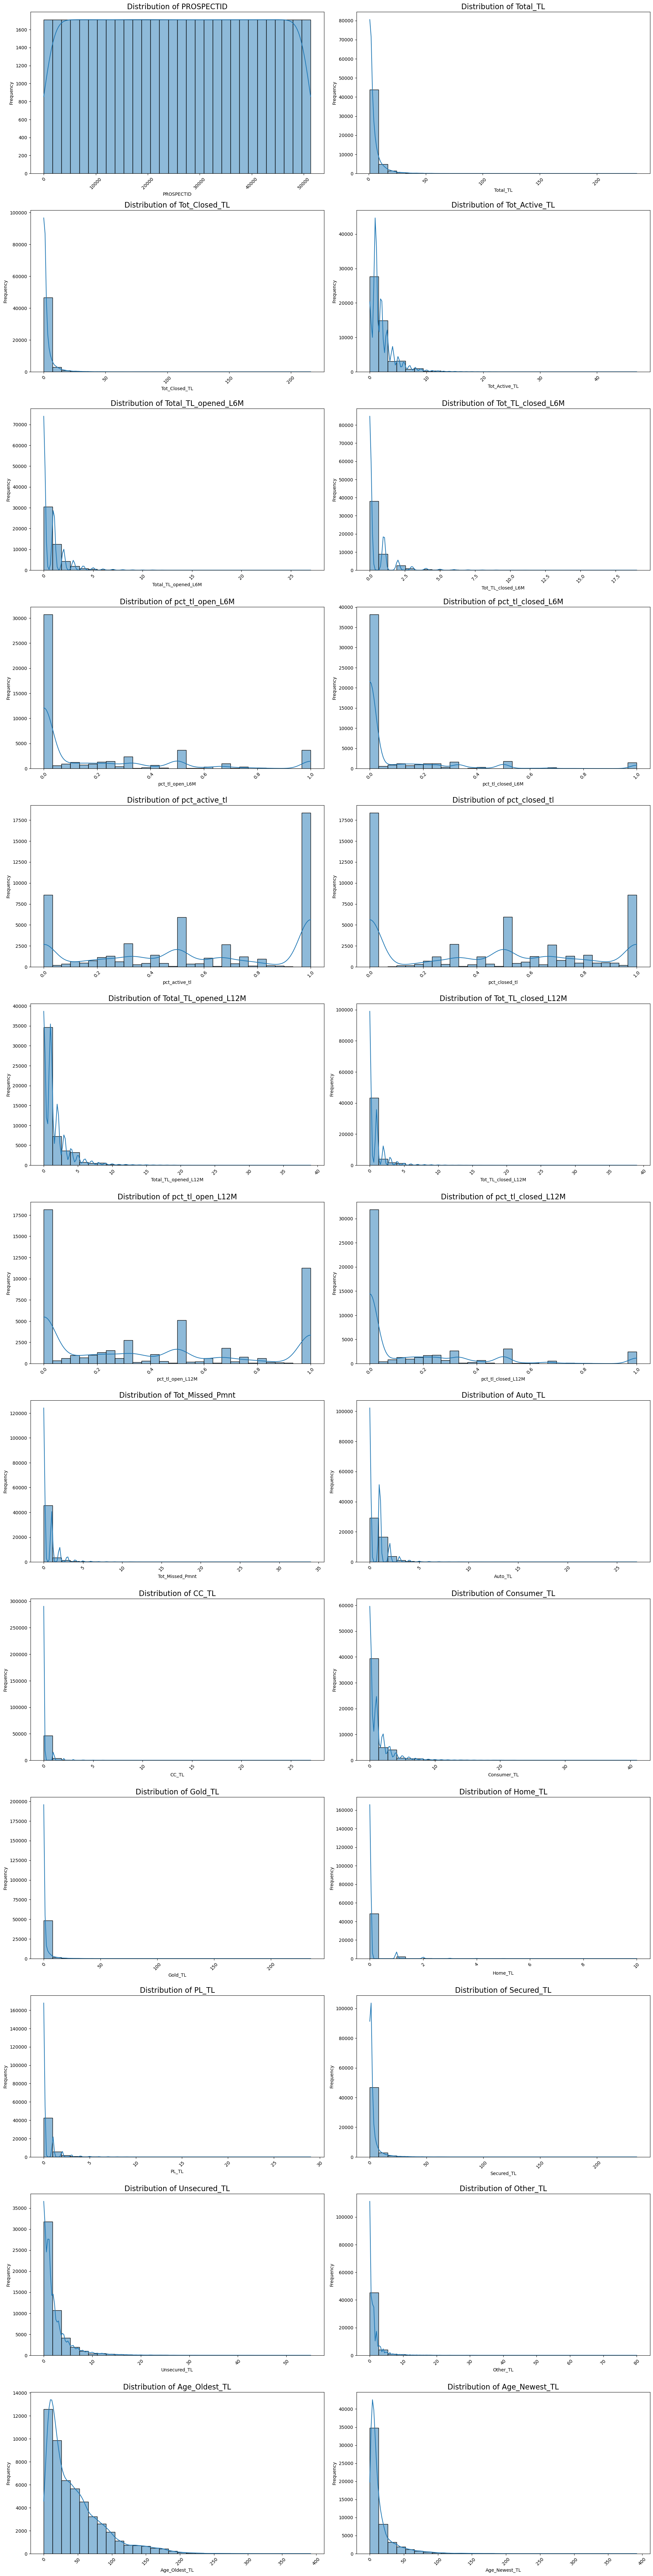

In [16]:
numeric_columns = df1_filtered.select_dtypes(include='number').columns 

# Determine the number of rows needed
n_rows = (len(numeric_columns) + 2) // 2  # Add 2 to round up if the total number isn't divisible by 3

# Create subplots
fig, axes = plt.subplots(n_rows, 2, figsize=(20, 6 * n_rows))

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# Loop through each column and plot its histogram
for i, col in enumerate(numeric_columns):
    sns.histplot(df1_filtered[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=16)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots 
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

<Axes: xlabel='pct_tl_open_L6M', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of pct_tl_open_L6M')

Text(0.5, 0, 'pct_tl_open_L6M')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='pct_tl_closed_L6M', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of pct_tl_closed_L6M')

Text(0.5, 0, 'pct_tl_closed_L6M')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='pct_active_tl', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of pct_active_tl')

Text(0.5, 0, 'pct_active_tl')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='pct_closed_tl', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of pct_closed_tl')

Text(0.5, 0, 'pct_closed_tl')

Text(0, 0.5, 'Frequency')

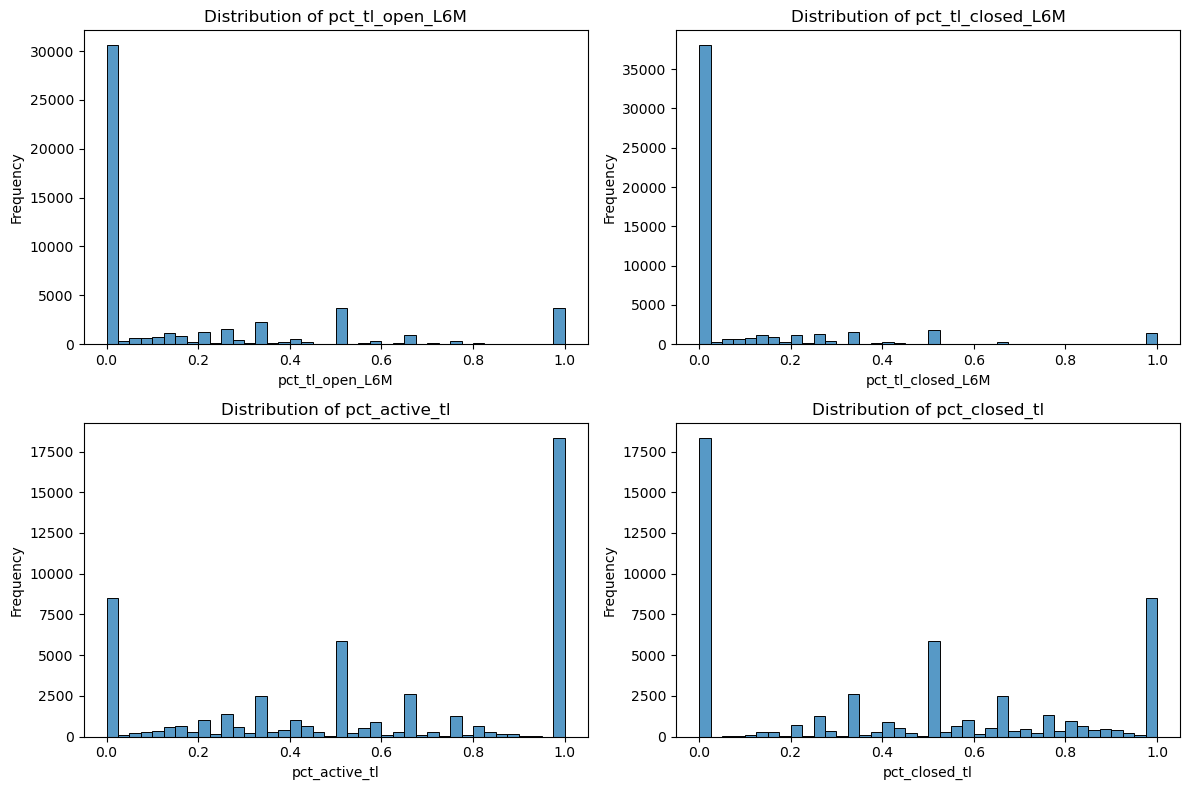

In [17]:
# Zoom into percent accounts

columns_to_plot = ['pct_tl_open_L6M', 'pct_tl_closed_L6M','pct_active_tl','pct_closed_tl']

# Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot histograms for each column
for i, col in enumerate(columns_to_plot):
    sns.histplot(df1_filtered[col], ax=axes[i], bins=40, kde=False)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust the layout
plt.tight_layout()
plt.show()

## Boxplots

In [18]:
#remove the PROSPECTID column- it doesn't require any further transformation or visualization
df1_filt= df1_filtered.drop(['PROSPECTID'],axis= 1)

<Figure size 1500x1000 with 0 Axes>

<Axes: >

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Total_TL'),
  Text(1, 0, 'Tot_Closed_TL'),
  Text(2, 0, 'Tot_Active_TL'),
  Text(3, 0, 'Total_TL_opened_L6M'),
  Text(4, 0, 'Tot_TL_closed_L6M'),
  Text(5, 0, 'pct_tl_open_L6M'),
  Text(6, 0, 'pct_tl_closed_L6M'),
  Text(7, 0, 'pct_active_tl'),
  Text(8, 0, 'pct_closed_tl'),
  Text(9, 0, 'Total_TL_opened_L12M'),
  Text(10, 0, 'Tot_TL_closed_L12M'),
  Text(11, 0, 'pct_tl_open_L12M'),
  Text(12, 0, 'pct_tl_closed_L12M'),
  Text(13, 0, 'Tot_Missed_Pmnt'),
  Text(14, 0, 'Auto_TL'),
  Text(15, 0, 'CC_TL'),
  Text(16, 0, 'Consumer_TL'),
  Text(17, 0, 'Gold_TL'),
  Text(18, 0, 'Home_TL'),
  Text(19, 0, 'PL_TL'),
  Text(20, 0, 'Secured_TL'),
  Text(21, 0, 'Unsecured_TL'),
  Text(22, 0, 'Other_TL'),
  Text(23, 0, 'Age_Oldest_TL'),
  Text(24, 0, 'Age_Newest_TL')])

Text(0.5, 1.0, 'Boxplots of Unscaled Numerical Variables')

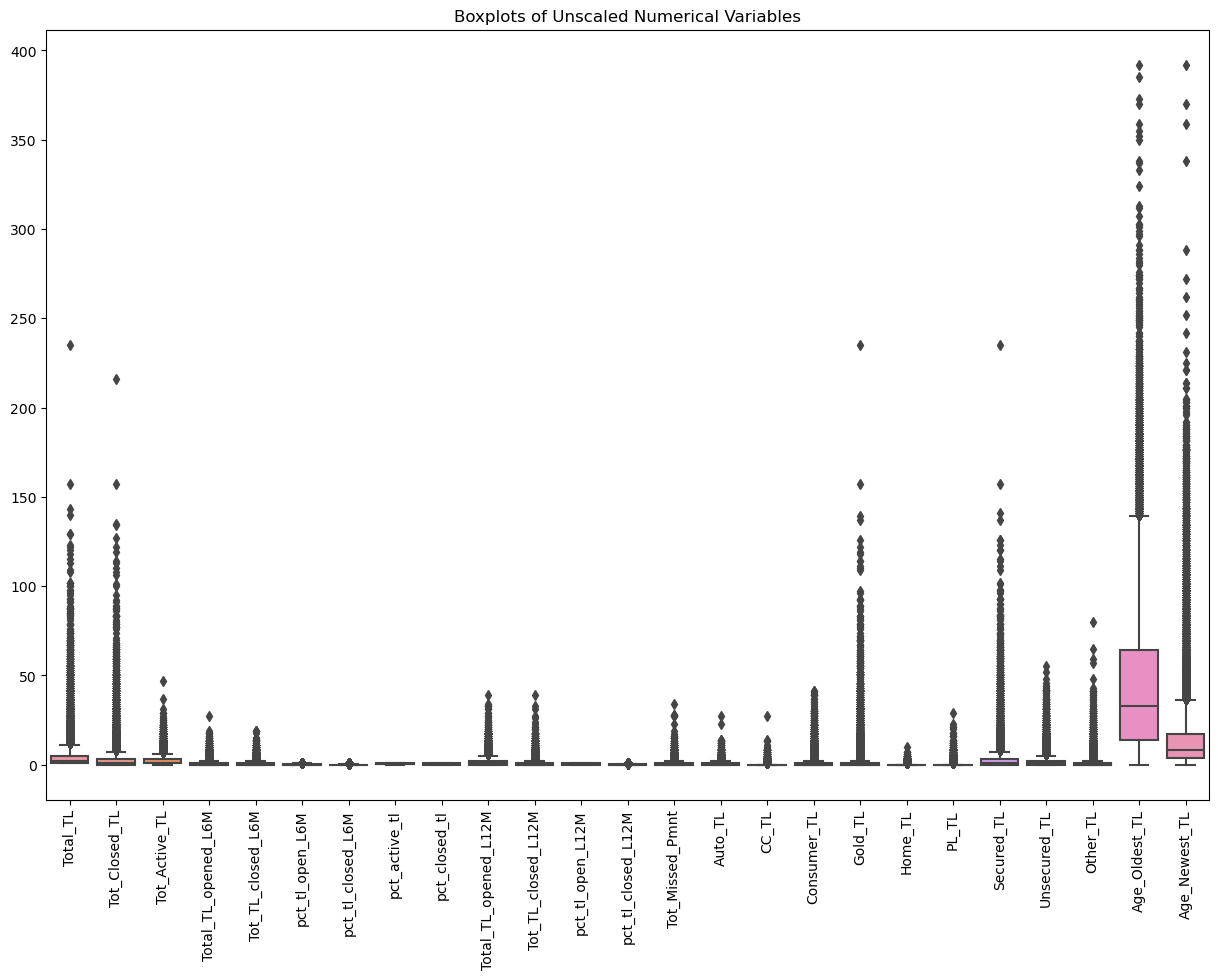

In [19]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df1_filt)
plt.xticks(rotation=90)
plt.title('Boxplots of Unscaled Numerical Variables')
plt.show()

From the visualizations of the features in both histograms and boxplots, it's clear that the dataset contains outliers

### Remove outliers using IQR

In [20]:
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    # Determine the lower and upper bound for each column
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove rows that have outliers in any column
    df_filtered = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
    
    return df_filtered

In [21]:
df1_iqr= remove_outliers_iqr(df1_filt)

<Figure size 1500x1000 with 0 Axes>

<Axes: >

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Total_TL'),
  Text(1, 0, 'Tot_Closed_TL'),
  Text(2, 0, 'Tot_Active_TL'),
  Text(3, 0, 'Total_TL_opened_L6M'),
  Text(4, 0, 'Tot_TL_closed_L6M'),
  Text(5, 0, 'pct_tl_open_L6M'),
  Text(6, 0, 'pct_tl_closed_L6M'),
  Text(7, 0, 'pct_active_tl'),
  Text(8, 0, 'pct_closed_tl'),
  Text(9, 0, 'Total_TL_opened_L12M'),
  Text(10, 0, 'Tot_TL_closed_L12M'),
  Text(11, 0, 'pct_tl_open_L12M'),
  Text(12, 0, 'pct_tl_closed_L12M'),
  Text(13, 0, 'Tot_Missed_Pmnt'),
  Text(14, 0, 'Auto_TL'),
  Text(15, 0, 'CC_TL'),
  Text(16, 0, 'Consumer_TL'),
  Text(17, 0, 'Gold_TL'),
  Text(18, 0, 'Home_TL'),
  Text(19, 0, 'PL_TL'),
  Text(20, 0, 'Secured_TL'),
  Text(21, 0, 'Unsecured_TL'),
  Text(22, 0, 'Other_TL'),
  Text(23, 0, 'Age_Oldest_TL'),
  Text(24, 0, 'Age_Newest_TL')])

Text(0.5, 1.0, 'Boxplots of Numerical Variables Using IQR')

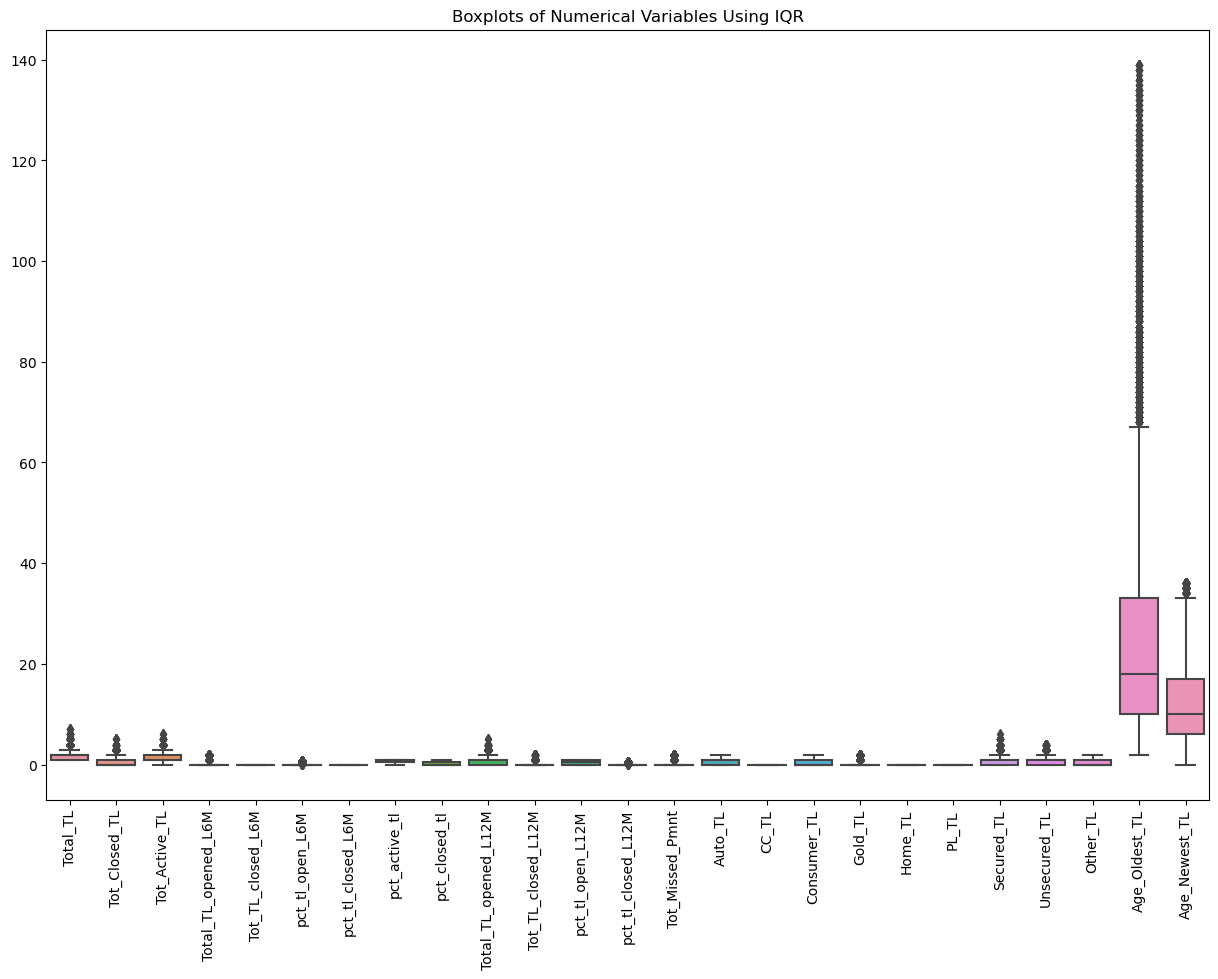

In [22]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df1_iqr)
plt.xticks(rotation=90)
plt.title('Boxplots of Numerical Variables Using IQR')
plt.show()

### Remove outliers using modified Z-score
Instead of using the mean and standard deviation, the modified Z-score uses the median and median absolute deviation (MAD) to handle data with outliers or non-normal distributions better

In [23]:
def remove_outliers_modified_zscore(df, threshold=3):
    median = df.median()
    mad = (df - median).abs().median()
    modified_z_scores = 0.6745 * (df - median) / mad
    return df[(modified_z_scores.abs() < threshold).all(axis=1)]

In [24]:
df1_filt.median()

Total_TL                 2.000
Tot_Closed_TL            1.000
Tot_Active_TL            1.000
Total_TL_opened_L6M      0.000
Tot_TL_closed_L6M        0.000
pct_tl_open_L6M          0.000
pct_tl_closed_L6M        0.000
pct_active_tl            0.556
pct_closed_tl            0.444
Total_TL_opened_L12M     1.000
Tot_TL_closed_L12M       0.000
pct_tl_open_L12M         0.333
pct_tl_closed_L12M       0.000
Tot_Missed_Pmnt          0.000
Auto_TL                  0.000
CC_TL                    0.000
Consumer_TL              0.000
Gold_TL                  0.000
Home_TL                  0.000
PL_TL                    0.000
Secured_TL               1.000
Unsecured_TL             1.000
Other_TL                 0.000
Age_Oldest_TL           33.000
Age_Newest_TL            8.000
dtype: float64

Because the MAD (Median Absolute Deviation) is zero due to columns having many repeated values, using this method would result in an empty DataFrame

### Percentile-Based Outlier Removal

Removes outliers by defining lower and upper bounds based on percentiles. For example, we might remove values below the 1st percentile and above the 99th percentile.It is useful for data with extreme skewness or when we want to remove extreme values at both ends of the distribution

In [25]:
def remove_outliers_percentile(df, lower_percentile=0.01, upper_percentile=0.80):
    lower_bound = df.quantile(lower_percentile)
    upper_bound = df.quantile(upper_percentile)
    return df[(df >= lower_bound) & (df <= upper_bound)].dropna()

In [26]:
percentile_df1= remove_outliers_percentile(df1_filt)

<Figure size 1500x1000 with 0 Axes>

<Axes: >

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Total_TL'),
  Text(1, 0, 'Tot_Closed_TL'),
  Text(2, 0, 'Tot_Active_TL'),
  Text(3, 0, 'Total_TL_opened_L6M'),
  Text(4, 0, 'Tot_TL_closed_L6M'),
  Text(5, 0, 'pct_tl_open_L6M'),
  Text(6, 0, 'pct_tl_closed_L6M'),
  Text(7, 0, 'pct_active_tl'),
  Text(8, 0, 'pct_closed_tl'),
  Text(9, 0, 'Total_TL_opened_L12M'),
  Text(10, 0, 'Tot_TL_closed_L12M'),
  Text(11, 0, 'pct_tl_open_L12M'),
  Text(12, 0, 'pct_tl_closed_L12M'),
  Text(13, 0, 'Tot_Missed_Pmnt'),
  Text(14, 0, 'Auto_TL'),
  Text(15, 0, 'CC_TL'),
  Text(16, 0, 'Consumer_TL'),
  Text(17, 0, 'Gold_TL'),
  Text(18, 0, 'Home_TL'),
  Text(19, 0, 'PL_TL'),
  Text(20, 0, 'Secured_TL'),
  Text(21, 0, 'Unsecured_TL'),
  Text(22, 0, 'Other_TL'),
  Text(23, 0, 'Age_Oldest_TL'),
  Text(24, 0, 'Age_Newest_TL')])

Text(0.5, 1.0, 'Boxplots of Numerical Variables Using Percentile Outlier Remover')

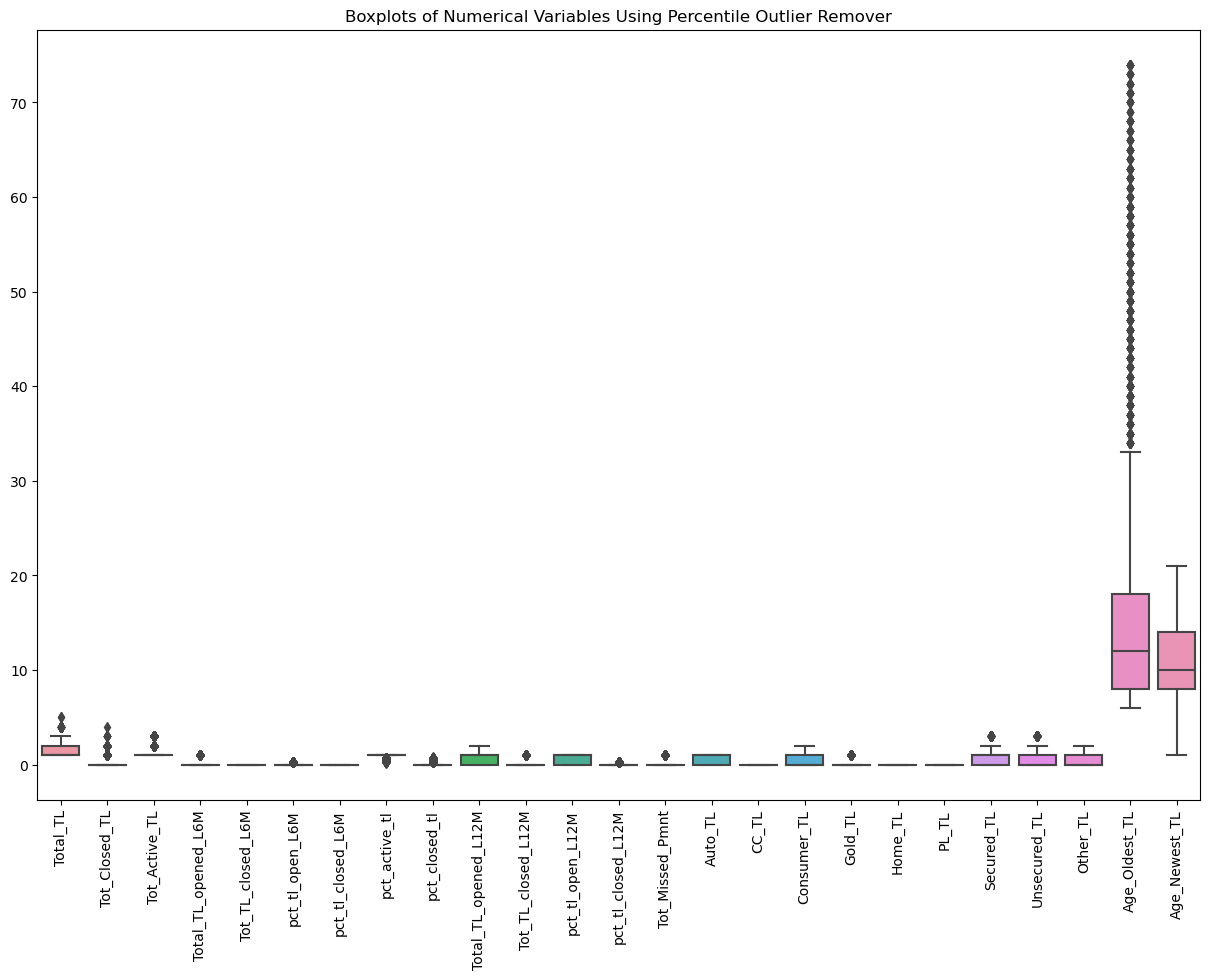

In [27]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=percentile_df1)
plt.xticks(rotation=90)
plt.title('Boxplots of Numerical Variables Using Percentile Outlier Remover')
plt.show()

### Transforming data

Next, let's apply some transformation to the data to reduce the impact of outliers.

### Log transformation

Best for right skewed data as it reduces the impact of large positive numbers

In [28]:
df1_log = np.log1p(df1_filt)

<Figure size 1500x1000 with 0 Axes>

<Axes: >

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Total_TL'),
  Text(1, 0, 'Tot_Closed_TL'),
  Text(2, 0, 'Tot_Active_TL'),
  Text(3, 0, 'Total_TL_opened_L6M'),
  Text(4, 0, 'Tot_TL_closed_L6M'),
  Text(5, 0, 'pct_tl_open_L6M'),
  Text(6, 0, 'pct_tl_closed_L6M'),
  Text(7, 0, 'pct_active_tl'),
  Text(8, 0, 'pct_closed_tl'),
  Text(9, 0, 'Total_TL_opened_L12M'),
  Text(10, 0, 'Tot_TL_closed_L12M'),
  Text(11, 0, 'pct_tl_open_L12M'),
  Text(12, 0, 'pct_tl_closed_L12M'),
  Text(13, 0, 'Tot_Missed_Pmnt'),
  Text(14, 0, 'Auto_TL'),
  Text(15, 0, 'CC_TL'),
  Text(16, 0, 'Consumer_TL'),
  Text(17, 0, 'Gold_TL'),
  Text(18, 0, 'Home_TL'),
  Text(19, 0, 'PL_TL'),
  Text(20, 0, 'Secured_TL'),
  Text(21, 0, 'Unsecured_TL'),
  Text(22, 0, 'Other_TL'),
  Text(23, 0, 'Age_Oldest_TL'),
  Text(24, 0, 'Age_Newest_TL')])

Text(0.5, 1.0, 'Boxplots of Numerical Variables on a Log Scale')

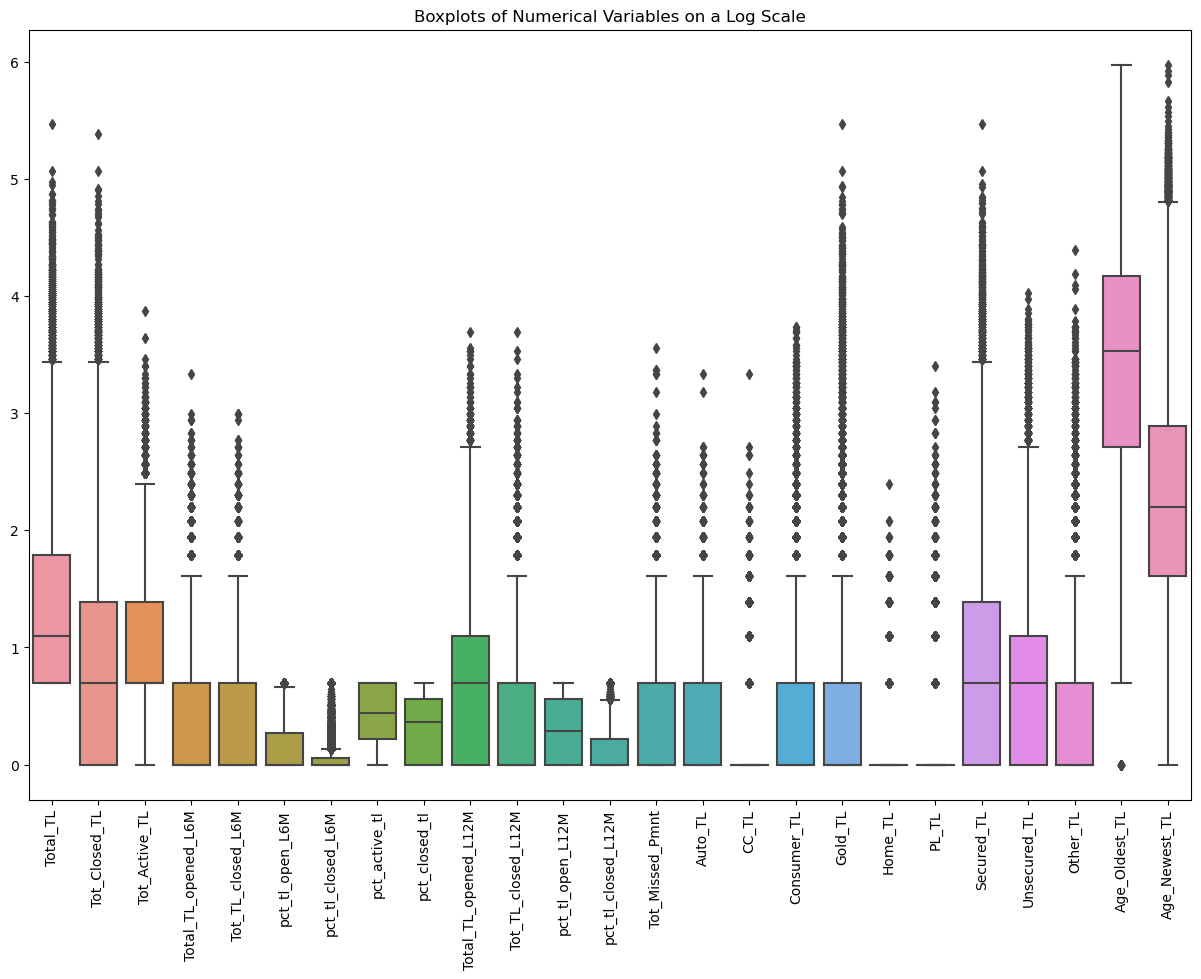

In [29]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df1_log)
plt.xticks(rotation=90)
plt.title('Boxplots of Numerical Variables on a Log Scale')
plt.show()

### Box-Cox Transformation (Positive values only)

Used to stabilize variance and make the data more normal-like. </br>
It works for positive values and offers flexibility in transformation by adjusting the lambda parameter. It is best for data with positive values that require normalization

In [30]:
from scipy import stats
# Define a function to apply Box-Cox transformation to each column
def apply_boxcox(df):
    df_transformed = pd.DataFrame()
    
    for col in df.columns:
        # Check if the column has all positive values
        if (df[col] > 0).all():
            # Apply Box-Cox transformation
            transformed_col, _ = stats.boxcox(df[col])
            df_transformed[col] = transformed_col
        else:
            print(f"Cannot apply Box-Cox on column {col} because it contains zero or negative values.")
    
    return df_transformed

In [31]:
df1_box= apply_boxcox(df1_filt)

Cannot apply Box-Cox on column Tot_Closed_TL because it contains zero or negative values.
Cannot apply Box-Cox on column Tot_Active_TL because it contains zero or negative values.
Cannot apply Box-Cox on column Total_TL_opened_L6M because it contains zero or negative values.
Cannot apply Box-Cox on column Tot_TL_closed_L6M because it contains zero or negative values.
Cannot apply Box-Cox on column pct_tl_open_L6M because it contains zero or negative values.
Cannot apply Box-Cox on column pct_tl_closed_L6M because it contains zero or negative values.
Cannot apply Box-Cox on column pct_active_tl because it contains zero or negative values.
Cannot apply Box-Cox on column pct_closed_tl because it contains zero or negative values.
Cannot apply Box-Cox on column Total_TL_opened_L12M because it contains zero or negative values.
Cannot apply Box-Cox on column Tot_TL_closed_L12M because it contains zero or negative values.
Cannot apply Box-Cox on column pct_tl_open_L12M because it contains zero

### Yeo Johonson Transformation

A variant of Box-Cox that also works for negative values and zero, making it more flexible.</br>
It is best for data that includes negative or zero values.

In [32]:
pt = PowerTransformer(method='yeo-johnson')
df1_yeo = pt.fit_transform(df1_filt)

In [33]:
df1_yeo

array([[ 0.74199209,  1.03517938, -0.34164656, ..., -0.85275617,
         0.89099188,  0.74211844],
       [-1.18587158, -1.16099118, -0.34164656, ..., -0.85275617,
        -1.33382921, -0.14280841],
       [ 1.16299471, -1.16099118,  1.91400629, ..., -0.85275617,
         0.41765253, -1.37077608],
       ...,
       [-0.305155  ,  0.01854431, -0.34164656, ..., -0.85275617,
        -1.1376555 , -0.47614556],
       [-0.305155  ,  0.01854431, -0.34164656, ..., -0.85275617,
        -0.70501514, -0.01226053],
       [-1.18587158, -1.16099118, -0.34164656, ..., -0.85275617,
        -0.44213409,  0.83413385]])

<Axes: >

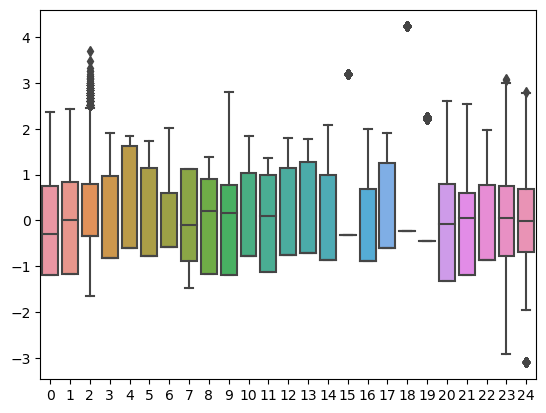

In [34]:
sns.boxplot(data= df1_yeo)

### Robust Scaling

Scales the data based on the interquartile range (IQR), which is robust to outliers. </br> 
It subtracts the median and scales according to the IQR, making it less sensitive to outliers.</br>

It is best for datasets with significant outliers where you want to reduce the influence of extreme values.

In [35]:
scaler = RobustScaler()
df1_robust = scaler.fit_transform(df1_filt)

<Figure size 1500x1000 with 0 Axes>

<Axes: >

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24')])

Text(0.5, 1.0, 'Boxplots of Numerical Variables on a Log Scale')

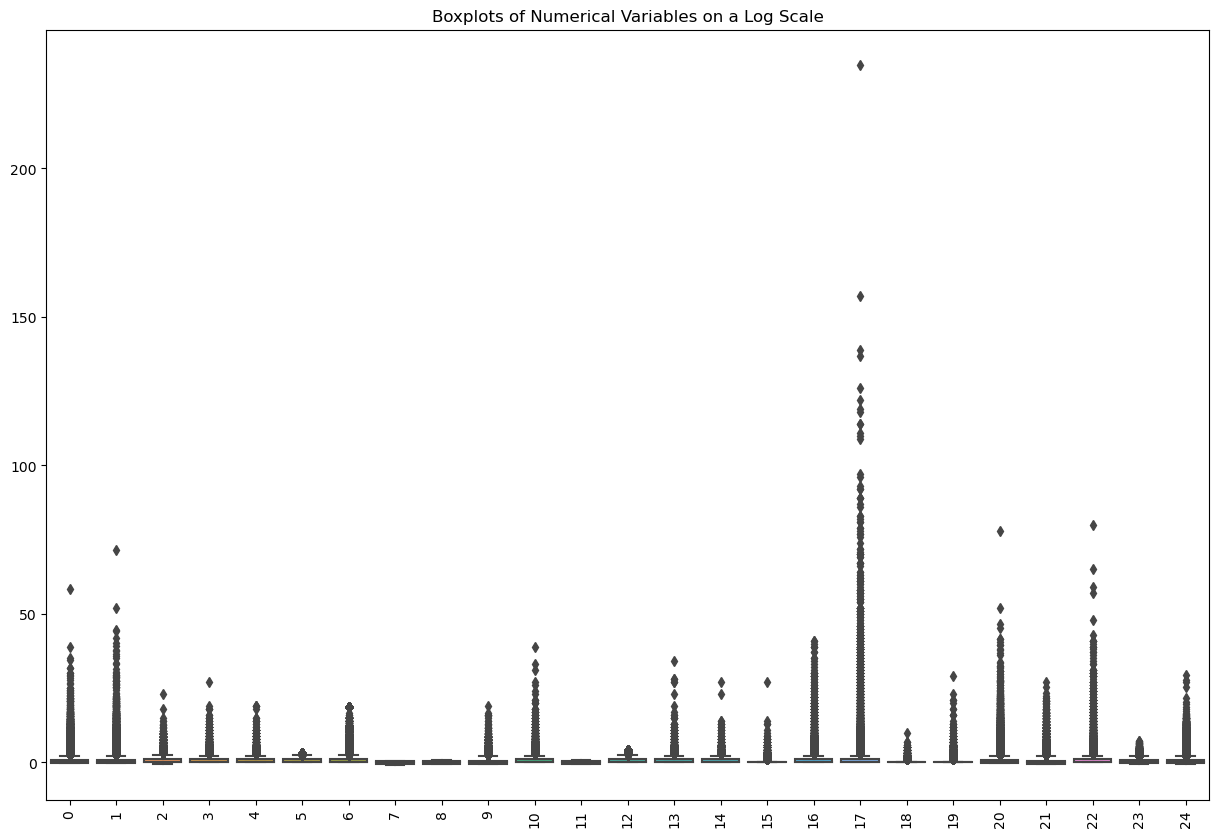

In [36]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df1_robust)
plt.xticks(rotation=90)
plt.title('Boxplots of Numerical Variables on a Log Scale')
plt.show()

### Min-Max scaling

Scales the data to a fixed range, typically between 0 and 1, by adjusting the minimum and maximum values. However, this method is sensitive to outliers since they can dominate the range.</br>

It is best for when we want to normalize data but we need to be aware of potential sensitivity to outliers.

In [37]:
min_scaler = MinMaxScaler()
df1_min_max = min_scaler.fit_transform(df1_filt)


<Axes: >

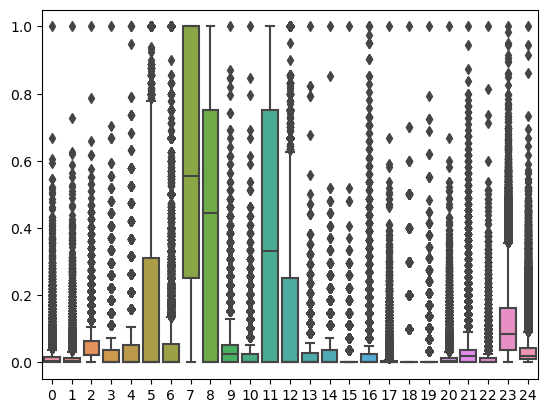

In [38]:
sns.boxplot(data= df1_min_max)

### Winsorization

Winsorization limits extreme values but keeps them in the dataset by setting the outliers to the nearest non-outlier value.</br>
It is best for reducing the impact of extreme outliers while keeping the overall data structure intact.

In [39]:
def apply_winsorization(df, lower_percentile=0.05, upper_percentile=0.05):
    df_winsorized = df.copy()
    
    for col in df_winsorized.select_dtypes(include=[float, int]).columns:  # Apply only to numeric columns
        df_winsorized[col] = winsorize(df_winsorized[col], limits=(lower_percentile, upper_percentile))
    
    return df_winsorized

In [40]:
df1_winso= apply_winsorization(df1_filt)

<Figure size 1500x1000 with 0 Axes>

<Axes: >

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Total_TL'),
  Text(1, 0, 'Tot_Closed_TL'),
  Text(2, 0, 'Tot_Active_TL'),
  Text(3, 0, 'Total_TL_opened_L6M'),
  Text(4, 0, 'Tot_TL_closed_L6M'),
  Text(5, 0, 'pct_tl_open_L6M'),
  Text(6, 0, 'pct_tl_closed_L6M'),
  Text(7, 0, 'pct_active_tl'),
  Text(8, 0, 'pct_closed_tl'),
  Text(9, 0, 'Total_TL_opened_L12M'),
  Text(10, 0, 'Tot_TL_closed_L12M'),
  Text(11, 0, 'pct_tl_open_L12M'),
  Text(12, 0, 'pct_tl_closed_L12M'),
  Text(13, 0, 'Tot_Missed_Pmnt'),
  Text(14, 0, 'Auto_TL'),
  Text(15, 0, 'CC_TL'),
  Text(16, 0, 'Consumer_TL'),
  Text(17, 0, 'Gold_TL'),
  Text(18, 0, 'Home_TL'),
  Text(19, 0, 'PL_TL'),
  Text(20, 0, 'Secured_TL'),
  Text(21, 0, 'Unsecured_TL'),
  Text(22, 0, 'Other_TL'),
  Text(23, 0, 'Age_Oldest_TL'),
  Text(24, 0, 'Age_Newest_TL')])

Text(0.5, 1.0, 'Boxplots of Winsorized Numerical Variables')

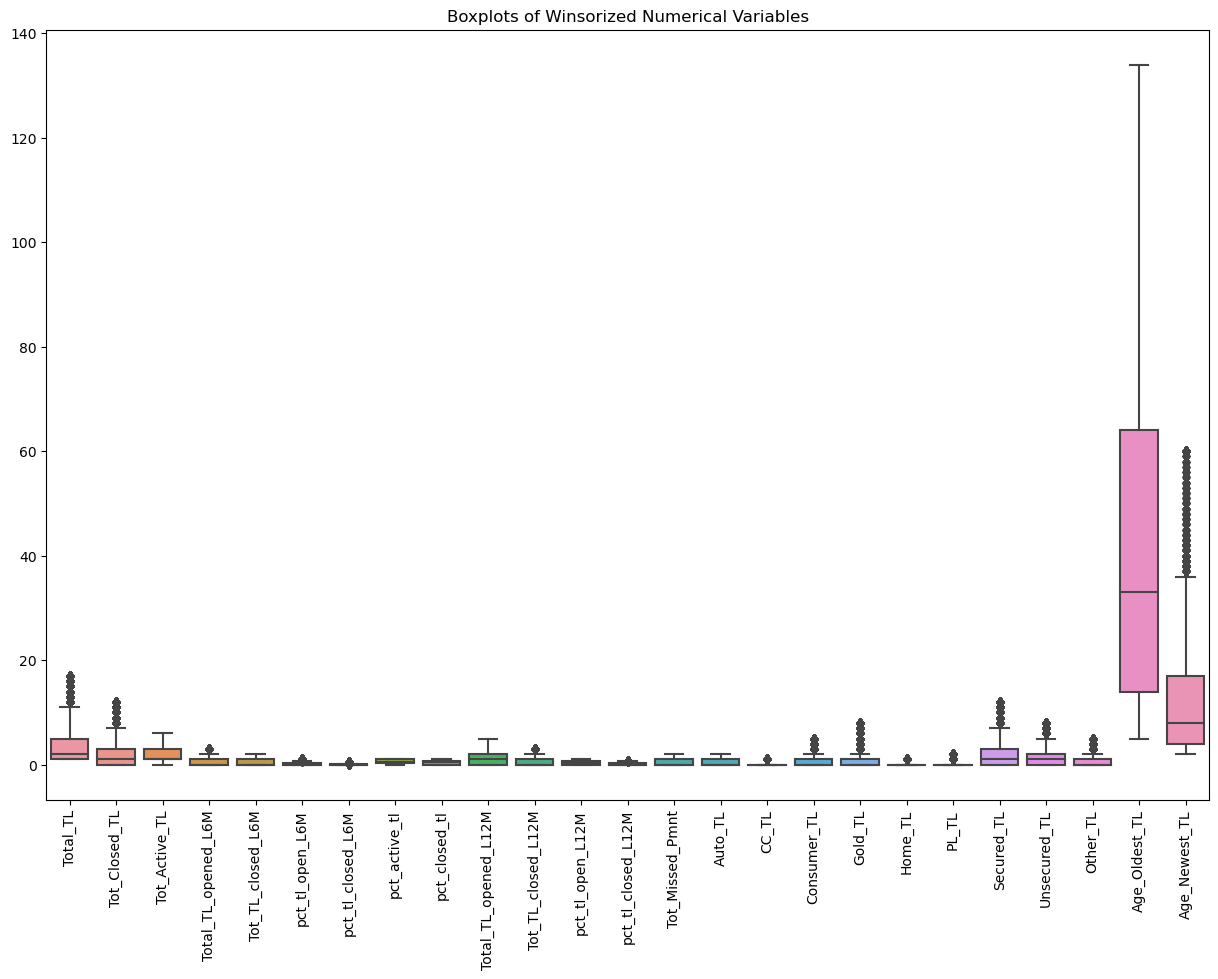

In [41]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df1_winso)
plt.xticks(rotation=90)
plt.title('Boxplots of Winsorized Numerical Variables')
plt.show()

## Feature engineering

Create new feattures from existing ones to make the data more suitable for modeling.

1. Account Age Differences: Measures the difference between the oldest and newest accounts to capture account tenure

In [42]:
df1_log.loc[:, 'Account_Tenure'] = df1_log.loc[:, 'Age_Oldest_TL'] - df1_log.loc[:,'Age_Newest_TL']

In [43]:
df1_log['Age_Oldest_TL']
df1_filt['Age_Oldest_TL'].value_counts()

0        4.290459
1        2.079442
2        3.871201
3        1.791759
4        4.882802
           ...   
51331    3.218876
51332    4.317488
51333    2.302585
51334    2.772589
51335    3.044522
Name: Age_Oldest_TL, Length: 51296, dtype: float64

7      1423
8      1393
10     1269
9      1169
6      1105
       ... 
234       1
230       1
262       1
333       1
337       1
Name: Age_Oldest_TL, Length: 294, dtype: int64

<Axes: xlabel='Account_Tenure', ylabel='Count'>

Text(0.5, 0, 'Value')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distriution of Account Tenure')

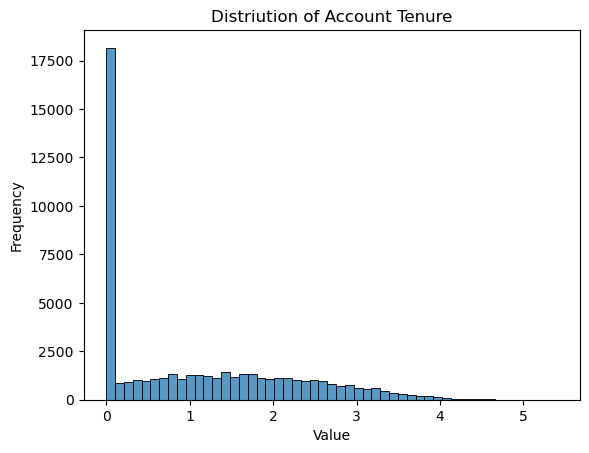

In [44]:
sns.histplot(data=df1_log, x="Account_Tenure")
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distriution of Account Tenure')
plt.show()

<Axes: xlabel='Account_Tenure'>

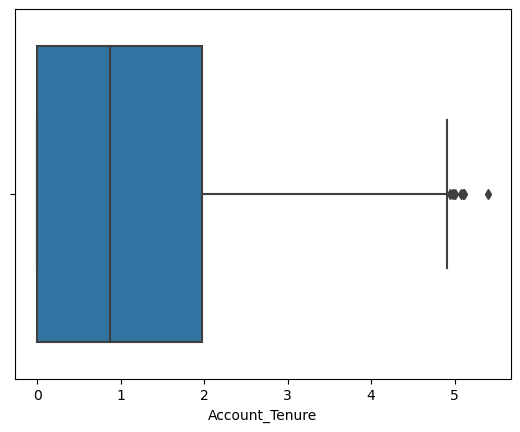

In [45]:
sns.boxplot(x= df1_log["Account_Tenure"])
plt.show()

In [46]:
df1_log.describe()

Total_TL  Tot_Closed_TL  Tot_Active_TL  Total_TL_opened_L6M  \
count  51296.000000   51296.000000   51296.000000         51296.000000   
mean       1.424458       0.850361       0.930950             0.385048   
std        0.738009       0.858451       0.606253             0.524913   
min        0.693147       0.000000       0.000000             0.000000   
25%        0.693147       0.000000       0.693147             0.000000   
50%        1.098612       0.693147       0.693147             0.000000   
75%        1.791759       1.386294       1.386294             0.693147   
max        5.463832       5.379897       3.871201             3.332205   

       Tot_TL_closed_L6M  pct_tl_open_L6M  pct_tl_closed_L6M  pct_active_tl  \
count       51296.000000     51296.000000       51296.000000   51296.000000   
mean            0.234026         0.143567           0.071862       0.424113   
std             0.432815         0.217098           0.154070       0.257247   
min             0.000000         0.000000           0.000000       0.000000   
25%             0.000000         0.000000           0.000000       0.223144   
50%             0.000000         0.000000           0.000000       0.442118   
75%             0.693147         0.271553           0.052592       0.693147   
max             2.995732         0.693147           0.693147       0.693147   

       pct_closed_tl  Total_TL_opened_L12M  Tot_TL_closed_L12M  \
count   51296.000000          51296.000000        51296.000000   
mean        0.316369              0.690808            0.370575   
std         0.269860              0.633879            0.534920   
min         0.000000              0.000000            0.000000   
25%         0.000000              0.000000            0.000000   
50%         0.367417              0.693147            0.000000   
75%         0.559616              1.098612            0.693147   
max         0.693147              3.688879            3.688879   

       pct_tl_open_L12M  pct_tl_closed_L12M  Tot_Missed_Pmnt       Auto_TL  \
count      51296.000000        51296.000000     51296.000000  51296.000000   
mean           0.295004            0.119653         0.301219      0.354709   
std            0.274345            0.190878         0.465405      0.443523   
min            0.000000            0.000000         0.000000      0.000000   
25%            0.000000            0.000000         0.000000      0.000000   
50%            0.287432            0.000000         0.000000      0.000000   
75%            0.559616            0.223144         0.693147      0.693147   
max            0.693147            0.693147         3.555348      3.332205   

              CC_TL   Consumer_TL       Gold_TL       Home_TL         PL_TL  \
count  51296.000000  51296.000000  51296.000000  51296.000000  51296.000000   
mean       0.073849      0.497747      0.410101      0.042909      0.152692   
std        0.249678      0.639853      0.790073      0.189542      0.369179   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.693147      0.693147      0.000000      0.000000   
max        3.332205      3.737670      5.463832      2.397895      3.401197   

         Secured_TL  Unsecured_TL      Other_TL  Age_Oldest_TL  Age_Newest_TL  \
count  51296.000000  51296.000000  51296.000000   51296.000000   51296.000000   
mean       0.896332      0.783648      0.467460       3.418731       2.305547   
std        0.819891      0.739903      0.632324       0.975828       0.960355   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%        0.000000      0.000000      0.000000       2.708050       1.609438   
50%        0.693147      0.693147      0.000000       3.526361       2.197225   
75%        1.386294      1.098612      0.693147       4

In [47]:
df1_log['PROSPECTID'] = df1['PROSPECTID']

In [48]:
df1_log.head()

Total_TL  Tot_Closed_TL  Tot_Active_TL  Total_TL_opened_L6M  \
0  1.791759       1.609438       0.693147             0.000000   
1  0.693147       0.000000       0.693147             0.000000   
2  2.197225       0.000000       2.197225             0.693147   
3  0.693147       0.000000       0.693147             0.693147   
4  1.386294       1.098612       0.693147             0.000000   

   Tot_TL_closed_L6M  pct_tl_open_L6M  pct_tl_closed_L6M  pct_active_tl  \
0                0.0         0.000000                0.0       0.182322   
1                0.0         0.000000                0.0       0.693147   
2                0.0         0.117783                0.0       0.693147   
3                0.0         0.693147                0.0       0.693147   
4                0.0         0.000000                0.0       0.287432   

   pct_closed_tl  Total_TL_opened_L12M  Tot_TL_closed_L12M  pct_tl_open_L12M  \
0       0.587787              0.000000                 0.0          0.000000   
1       0.000000              0.693147                 0.0          0.693147   
2       0.000000              1.098612                 0.0          0.223144   
3       0.000000              0.693147                 0.0          0.693147   
4       0.511026              0.000000                 0.0          0.000000   

   pct_tl_closed_L12M  Tot_Missed_Pmnt   Auto_TL  CC_TL  Consumer_TL  \
0                 0.0         0.000000  0.000000    0.0     0.000000   
1                 0.0         0.000000  0.000000    0.0     0.693147   
2                 0.0         0.693147  0.693147    0.0     1.945910   
3                 0.0         0.693147  0.000000    0.0     0.000000   
4                 0.0         0.000000  0.693147    0.0     0.000000   

    Gold_TL  Home_TL     PL_TL  Secured_TL  Unsecured_TL  Other_TL  \
0  0.693147      0.0  1.609438    0.693147      1.609438  0.000000   
1  0.000000      0.0  0.000000    0.000000      0.693147  0.000000   
2  0.693147      0.0  0.000000    1.098612      1.945910  0.000000   
3  0.000000      0.0  0.000000    0.000000      0.693147  0.693147   
4  0.000000      0.0  0.000000    1.386294      0.000000  1.098612   

   Age_Oldest_TL  Age_Newest_TL  Account_Tenure  PROSPECTID  
0       4.290459       2.944439        1.346020           1  
1       2.079442       2.079442        0.000000           2  
2       3.871201       1.098612        2.772589           3  
3       1.791759       1.791759        0.000000           4  
4       4.882802       3.496508        1.386294           5

# Preprocessing the External Data File

In [49]:
df2.head()

PROSPECTID  time_since_recent_payment  time_since_first_deliquency  \
0           1                        549                           35   
1           2                         47                       -99999   
2           3                        302                           11   
3           4                     -99999                       -99999   
4           5                        583                       -99999   

   time_since_recent_deliquency  num_times_delinquent  max_delinquency_level  \
0                            15                    11                     29   
1                        -99999                     0                 -99999   
2                             3                     9                     25   
3                        -99999                     0                 -99999   
4                        -99999                     0                 -99999   

   max_recent_level_of_deliq  num_deliq_6mts  num_deliq_12mts  \
0                         29               0                0   
1                          0               0                0   
2                         25               1                9   
3                          0               0                0   
4                          0               0                0   

   num_deliq_6_12mts  max_deliq_6mts  max_deliq_12mts  num_times_30p_dpd  \
0                  0          -99999           -99999                  0   
1                  0               0                0                  0   
2                  8              25               25                  0   
3                  0          -99999           -99999                  0   
4                  0          -99999           -99999                  0   

   num_times_60p_dpd  num_std  num_std_6mts  num_std_12mts  num_sub  \
0                  0       21             5             11        0   
1                  0        0             0              0        0   
2                  0       10             5             10        0   
3                  0        5             4              5        0   
4                  0       53             4             16        0   

   num_sub_6mts  num_sub_12mts  num_dbt  num_dbt_6mts  num_dbt_12mts  num_lss  \
0             0              0        0             0              0        0   
1             0              0        0             0              0        0   
2             0              0        0             0              0        0   
3             0              0        0             0              0        0   
4             0              0        0             0              0        0   

   num_lss_6mts  num_lss_12mts  recent_level_of_deliq  tot_enq  CC_enq  \
0             0              0                     29        6       0   
1             0              0                      0        1       0   
2             0              0                     25        4       0   
3             0              0                      0   -99999  -99999   
4             0              0                      0        1       0   

   CC_enq_L6m  CC_enq_L12m  PL_enq  PL_enq_L6m  PL_enq_L12m  \
0           0            0       6           0            0   
1           0            0       0           0            0   
2           0            0       0           0            0   
3      -99999       -99999  -99999      -99999       -99999   
4           0            0       0           0            0   

   time_since_recent_enq  enq_L12m  enq_L6m  enq_L3m MARITALSTATUS  \
0                    566         0        0        0       Married   
1                    209         1        0        0        Single   
2                    587         0        0        0       Married   
3                 -99999    -99999   -99999   -99999       Married   
4                   3951         0        0        0       Married   

       EDUCATION  AGE GENDER  NETMONTHLYINCOME  Time_With_Curr_Empr  \
0    

In [50]:
df2.shape

(51336, 62)

In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    51336 non-null  int64  
 1   time_since_recent_payment     51336 non-null  int64  
 2   time_since_first_deliquency   51336 non-null  int64  
 3   time_since_recent_deliquency  51336 non-null  int64  
 4   num_times_delinquent          51336 non-null  int64  
 5   max_delinquency_level         51336 non-null  int64  
 6   max_recent_level_of_deliq     51336 non-null  int64  
 7   num_deliq_6mts                51336 non-null  int64  
 8   num_deliq_12mts               51336 non-null  int64  
 9   num_deliq_6_12mts             51336 non-null  int64  
 10  max_deliq_6mts                51336 non-null  int64  
 11  max_deliq_12mts               51336 non-null  int64  
 12  num_times_30p_dpd             51336 non-null  int64  
 13  n

In [52]:
df2.select_dtypes(include=['object']).columns

Index(['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2',
       'first_prod_enq2', 'Approved_Flag'],
      dtype='object')

In [53]:
label= df2.loc[:,'Approved_Flag']

In [54]:
label.value_counts()

P2    32199
P3     7452
P4     5882
P1     5803
Name: Approved_Flag, dtype: int64

## Distribution of the target variable

<Axes: xlabel='Approved_Flag', ylabel='count'>

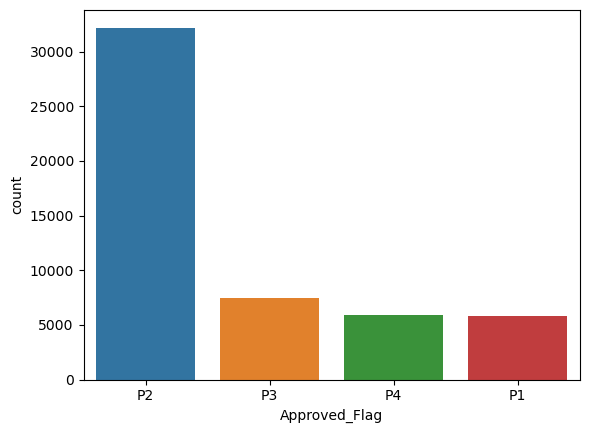

In [55]:
sns.countplot(x='Approved_Flag', data=df2, order = df2['Approved_Flag'].value_counts().index)

In [56]:
df2.describe().transpose()

count          mean           std      min  \
PROSPECTID                    51336.0  25668.500000  14819.571046      1.0   
time_since_recent_payment     51336.0  -8129.961314  27749.328514 -99999.0   
time_since_first_deliquency   51336.0 -70020.091320  45823.312757 -99999.0   
time_since_recent_deliquency  51336.0 -70022.375838  45819.820741 -99999.0   
num_times_delinquent          51336.0      1.573749      4.165012      0.0   
max_delinquency_level         51336.0 -70003.987085  45847.976100 -99999.0   
max_recent_level_of_deliq     51336.0     13.521953     53.336976      0.0   
num_deliq_6mts                51336.0      0.184977      0.710240      0.0   
num_deliq_12mts               51336.0      0.480053      1.522210      0.0   
num_deliq_6_12mts             51336.0      0.295076      1.027471      0.0   
max_deliq_6mts                51336.0 -25105.208587  43366.162767 -99999.0   
max_deliq_12mts               51336.0 -21092.727676  40805.742595 -99999.0   
num_times_30p_dpd             51336.0      0.728884      2.762120      0.0   
num_times_60p_dpd             51336.0      0.426971      2.101404      0.0   
num_std                       51336.0      9.204671     21.308881      0.0   
num_std_6mts                  51336.0      1.484027      3.364581      0.0   
num_std_12mts                 51336.0      3.319444      7.518414      0.0   
num_sub                       51336.0      0.062646      0.801218      0.0   
num_sub_6mts                  51336.0      0.002435      0.091383      0.0   
num_sub_12mts                 51336.0      0.009292      0.233403      0.0   
num_dbt                       51336.0      0.025947      0.635611      0.0   
num_dbt_6mts                  51336.0      0.001208      0.070331      0.0   
num_dbt_12mts                 51336.0      0.004130      0.179885      0.0   
num_lss                       51336.0      0.015097      0.529730      0.0   
num_lss_6mts                  51336.0      0.000974      0.075413      0.0   
num_lss_12mts                 51336.0      0.002844      0.185349      0.0   
recent_level_of_deliq         51336.0     11.266090     46.100309      0.0   
tot_enq                       51336.0 -12308.234046  32860.363869 -99999.0   
CC_enq                        51336.0 -12312.463866  32858.778356 -99999.0   
CC_enq_L6m                    51336.0 -12312.734261  32858.677000 -99999.0   
CC_enq_L12m                   51336.0 -12312.644869  32858.710505 -99999.0   
PL_enq                        51336.0 -12311.878195  32858.997860 -99999.0   
PL_enq_L6m                    51336.0 -12312.429270  32858.791308 -99999.0   
PL_enq_L12m                   51336.0 -12312.209229  32858.873781 -99999.0   
time_since_recent_enq         51336.0 -12084.842099  32946.916037 -99999.0   
enq_L12m                      51336.0 -12310.233248  32859.614436 -99999.0   
enq_L6m                       51336.0 -12311.123987  32859.280542 -99999.0   
enq_L3m                       51336.0 -12311.784771  32859.032853 -99999.0   
AGE                           51336.0     33.758532      8.816364     21.0   
NETMONTHLYINCOME              51336.0  26424.185640  20027.108841      0.0   
Time_With_Curr_Empr           51336.0    110.707846     76.046831      0.0   
pct_of_active_TLs_ever        51336.0      0.577542      0.379867      0.0   
pct_opened_TLs_L6m_of_L12m    51336.0      0.302955      0.406049      0.0   
pct_currentBal_all_TL         51336.0   -139.416072   3742.613530 -99999.0   
CC_utilization                51336.0 -92791.608990  25861.225129 -99999.0   
CC_Flag                       51336.0      0.089469      0.285423      0.0   
PL_utilization                51336.0 -86556.225194  34111.414750 -99999.0   
PL_Flag                       51336.0      0.167874      0.373758      0.0   
pct_PL_enq_L6m_of_L12m        51336.0      0.190414      0.376218      0.0   
pct_CC_enq_L6m_of_L12m        51336.0      0.065182      0.235706      0.0   
pct_PL_enq_L6m_of_ever        51336.0      0.170492   

<Figure size 4000x2000 with 0 Axes>

<Axes: >

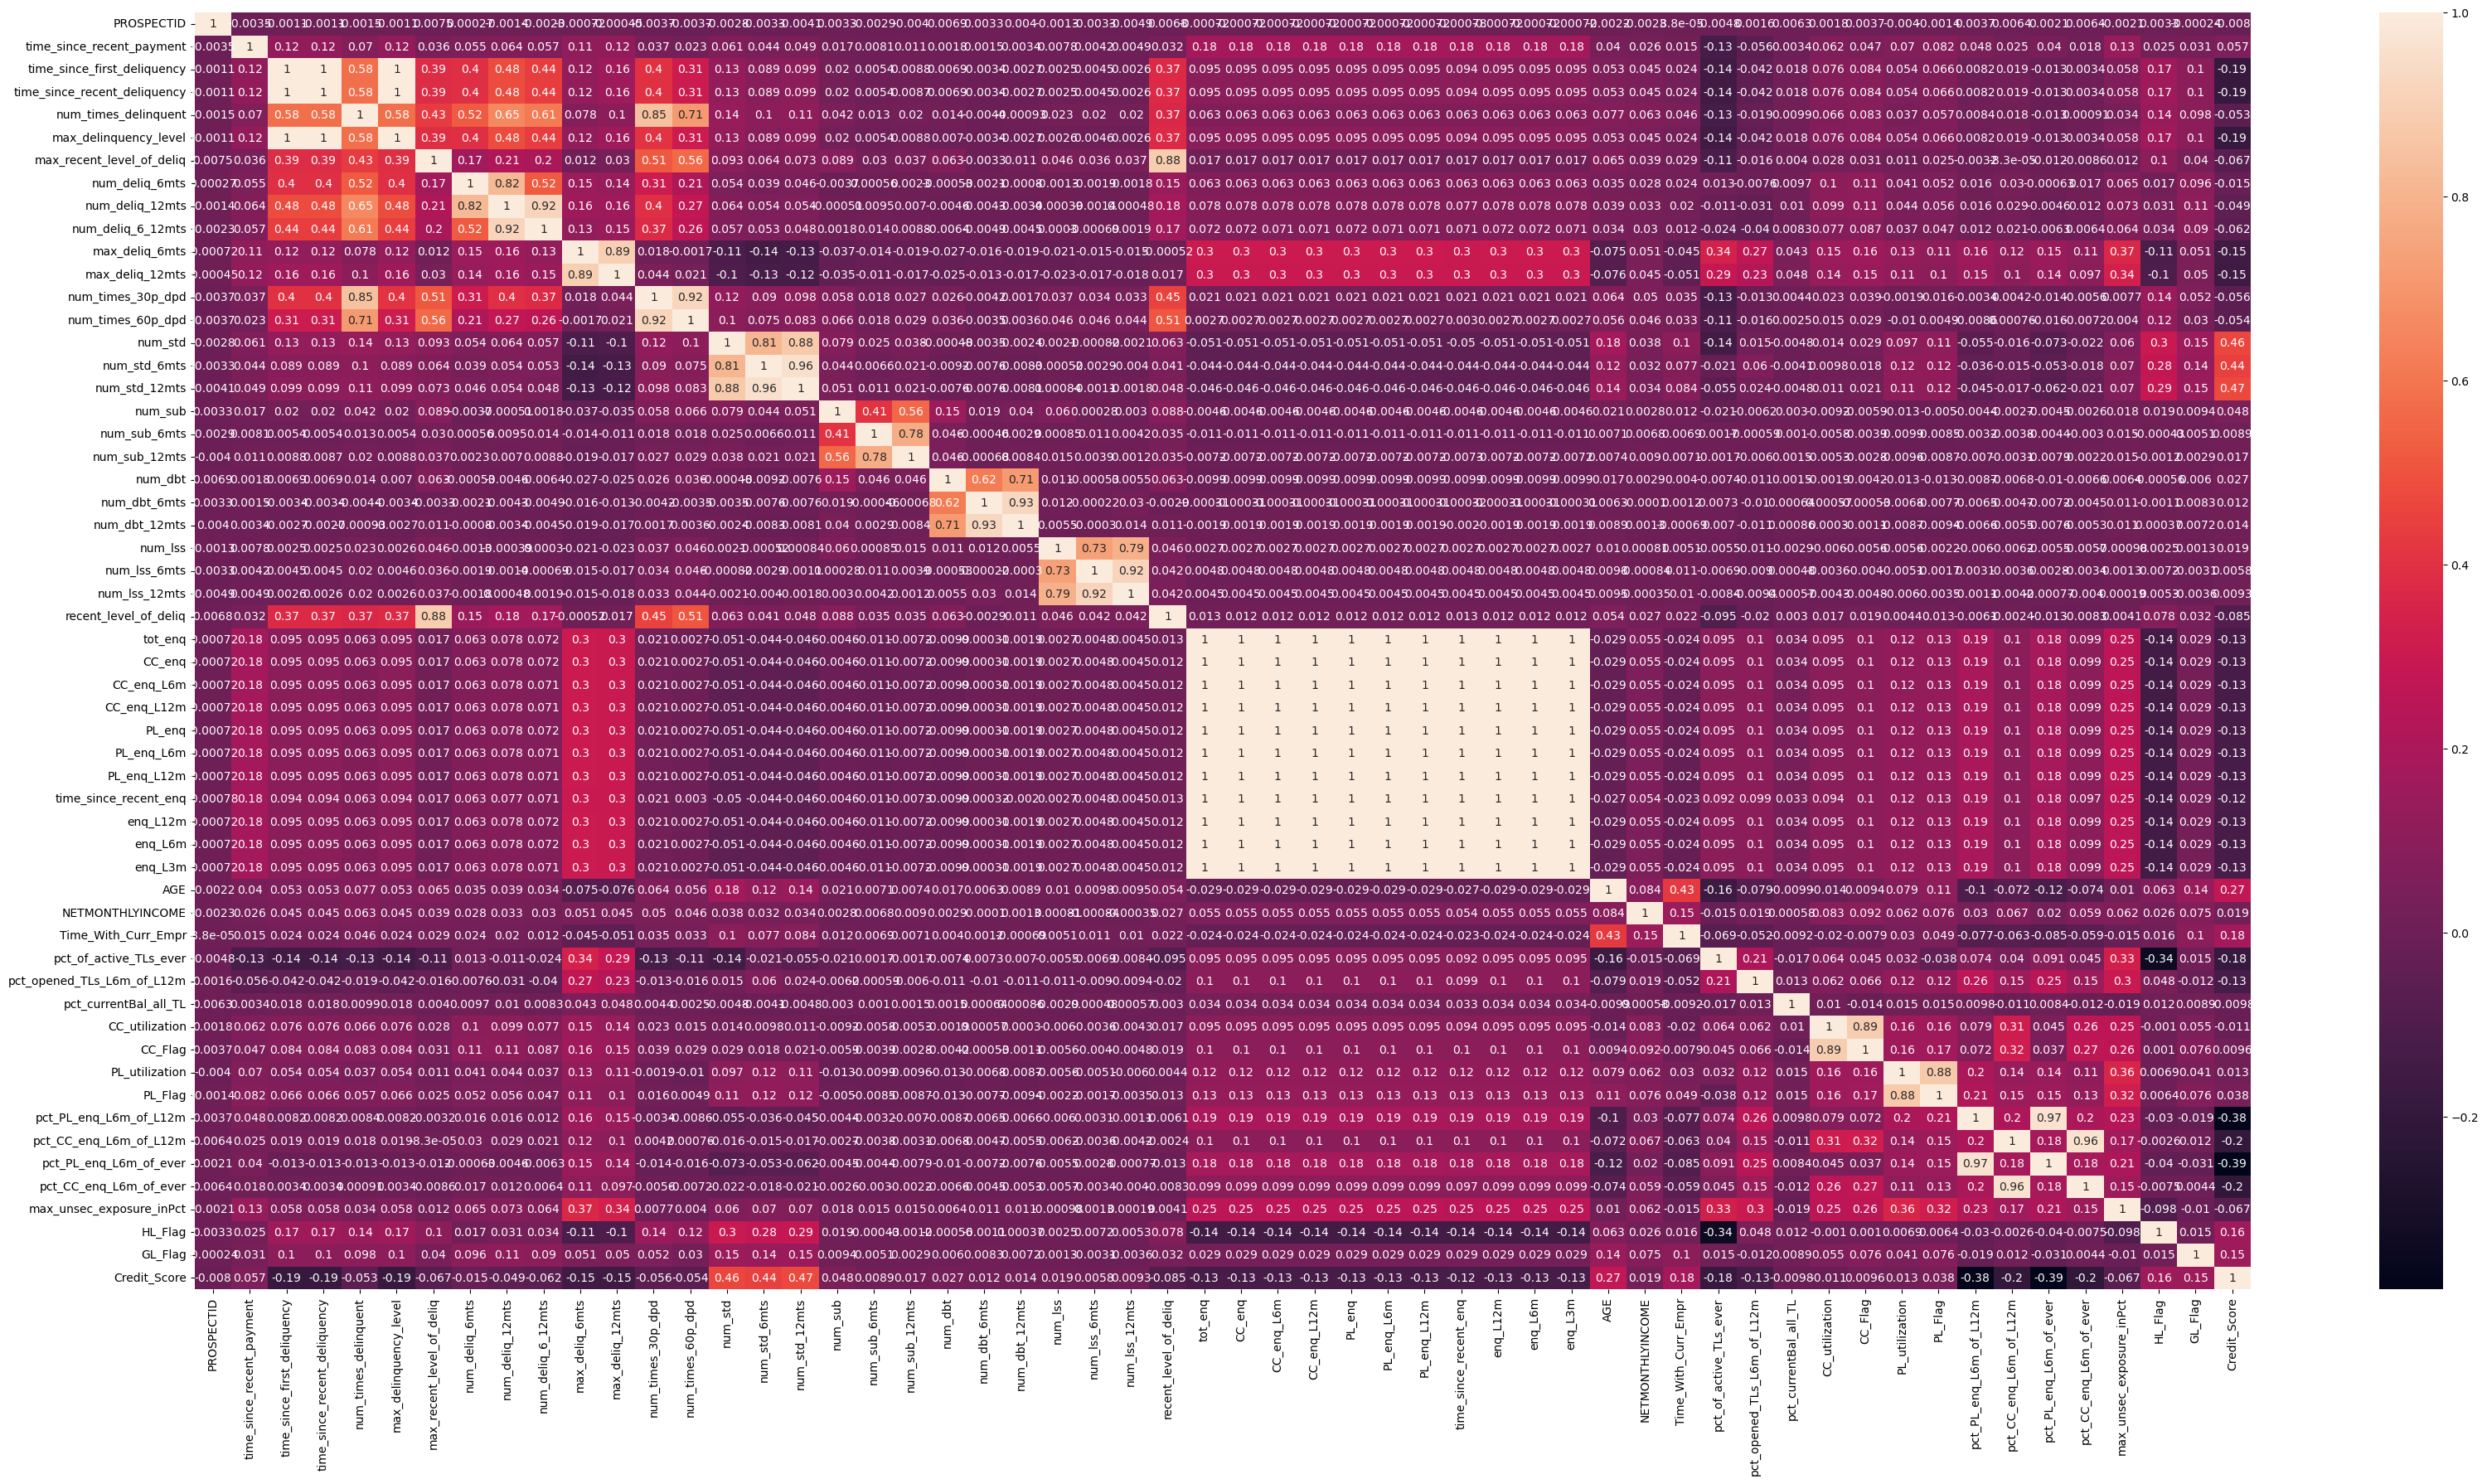

In [57]:
plt.figure(figsize=(40,20))
sns.heatmap(df2.corr(),annot=True)
plt.show()

In [58]:
# numeric_cols = df2.select_dtypes(include=['float64', 'int64']).columns
# categorical_cols = df2.select_dtypes(include=['object']).columns

# # Plot histograms for numeric columns
# for col in numeric_cols:
#     plt.figure(figsize=(6, 4))
#     sns.histplot(df2[col], kde=True)
#     plt.title(f'Distribution of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')
#     plt.show()

## Remove NaNs and Non-Sensical Values

In [59]:
numeric_cols = df2.select_dtypes(include=['number'])

# Select columns that have any negative values
columns_with_negatives = numeric_cols.columns[(numeric_cols < 0).any(axis=0)]
columns_with_negatives

Index(['time_since_recent_payment', 'time_since_first_deliquency',
       'time_since_recent_deliquency', 'max_delinquency_level',
       'max_deliq_6mts', 'max_deliq_12mts', 'tot_enq', 'CC_enq', 'CC_enq_L6m',
       'CC_enq_L12m', 'PL_enq', 'PL_enq_L6m', 'PL_enq_L12m',
       'time_since_recent_enq', 'enq_L12m', 'enq_L6m', 'enq_L3m',
       'pct_currentBal_all_TL', 'CC_utilization', 'PL_utilization',
       'max_unsec_exposure_inPct'],
      dtype='object')

In [60]:
df2_nan= df2.replace(-99999,np.nan)

In [61]:
df2_nan.isnull().sum()

# Calculate the proportion of NaN values in each column
nan_proportions = df2_nan.isna().mean()
nan_proportions

PROSPECTID                          0
time_since_recent_payment        4291
time_since_first_deliquency     35949
time_since_recent_deliquency    35949
num_times_delinquent                0
                                ...  
GL_Flag                             0
last_prod_enq2                      0
first_prod_enq2                     0
Credit_Score                        0
Approved_Flag                       0
Length: 62, dtype: int64

PROSPECTID                      0.000000
time_since_recent_payment       0.083587
time_since_first_deliquency     0.700269
time_since_recent_deliquency    0.700269
num_times_delinquent            0.000000
                                  ...   
GL_Flag                         0.000000
last_prod_enq2                  0.000000
first_prod_enq2                 0.000000
Credit_Score                    0.000000
Approved_Flag                   0.000000
Length: 62, dtype: float64

In [62]:
# Drop columns where the proportion of NaN values is greater than the threshold
threshold= 0.7
df2_cleaned = df2_nan.loc[:, nan_proportions < threshold]

In [63]:
df2_cleaned.shape

(51336, 57)

In [64]:
removed_columns = [col for col in df2.columns if col not in df2_cleaned.columns]
removed_columns

['time_since_first_deliquency',
 'time_since_recent_deliquency',
 'max_delinquency_level',
 'CC_utilization',
 'PL_utilization']

These are the columns that have been removed due to having a high percentage of missing values: ['time_since_first_deliquency',
 'time_since_recent_deliquency',
 'max_delinquency_level',
 'CC_utilization',
 'PL_utilization']. Now, let's check the rest of the columns that contain missing values and decide on how to further process them

In [65]:
df2_cleaned.isna().mean()

PROSPECTID                    0.000000
time_since_recent_payment     0.083587
num_times_delinquent          0.000000
max_recent_level_of_deliq     0.000000
num_deliq_6mts                0.000000
num_deliq_12mts               0.000000
num_deliq_6_12mts             0.000000
max_deliq_6mts                0.251091
max_deliq_12mts               0.211002
num_times_30p_dpd             0.000000
num_times_60p_dpd             0.000000
num_std                       0.000000
num_std_6mts                  0.000000
num_std_12mts                 0.000000
num_sub                       0.000000
num_sub_6mts                  0.000000
num_sub_12mts                 0.000000
num_dbt                       0.000000
num_dbt_6mts                  0.000000
num_dbt_12mts                 0.000000
num_lss                       0.000000
num_lss_6mts                  0.000000
num_lss_12mts                 0.000000
recent_level_of_deliq         0.000000
tot_enq                       0.123130
CC_enq                   

Let's further drop columns that more than 4000 missing values or a proportion higher than 0.08

In [66]:
df2_cle = df2_cleaned.loc[:, nan_proportions < 0.08]

In [67]:
df2_cle.isnull().sum()

PROSPECTID                     0
num_times_delinquent           0
max_recent_level_of_deliq      0
num_deliq_6mts                 0
num_deliq_12mts                0
num_deliq_6_12mts              0
num_times_30p_dpd              0
num_times_60p_dpd              0
num_std                        0
num_std_6mts                   0
num_std_12mts                  0
num_sub                        0
num_sub_6mts                   0
num_sub_12mts                  0
num_dbt                        0
num_dbt_6mts                   0
num_dbt_12mts                  0
num_lss                        0
num_lss_6mts                   0
num_lss_12mts                  0
recent_level_of_deliq          0
MARITALSTATUS                  0
EDUCATION                      0
AGE                            0
GENDER                         0
NETMONTHLYINCOME               0
Time_With_Curr_Empr            0
pct_of_active_TLs_ever         0
pct_opened_TLs_L6m_of_L12m     0
pct_currentBal_all_TL         72
CC_Flag   

The only column that has any missing values is pct_currentBal_all_TL (Percent current balance of all accounts). Because there are only 72 missing values, dropping the column might lead to a loss of information. We have a few options:

1. Impute the missing values
2. Remove the rows that contain the missing values (we will move forward with this option)

In [68]:
# Proportion of missing values in each row
missing_proportions = df2_cleaned.isna().mean(axis=1)
print("\nProportion of missing values in each row:")
print(missing_proportions)


Proportion of missing values in each row:
0        0.035088
1        0.000000
2        0.000000
3        0.245614
4        0.052632
           ...   
51331    0.000000
51332    0.000000
51333    0.000000
51334    0.000000
51335    0.052632
Length: 51336, dtype: float64


In [69]:
# Drop rows where the 'B' column has NaN values
df_cle = df2_cle.dropna(subset=['pct_currentBal_all_TL'])

In [70]:
df_cle.isna().sum()

PROSPECTID                    0
num_times_delinquent          0
max_recent_level_of_deliq     0
num_deliq_6mts                0
num_deliq_12mts               0
num_deliq_6_12mts             0
num_times_30p_dpd             0
num_times_60p_dpd             0
num_std                       0
num_std_6mts                  0
num_std_12mts                 0
num_sub                       0
num_sub_6mts                  0
num_sub_12mts                 0
num_dbt                       0
num_dbt_6mts                  0
num_dbt_12mts                 0
num_lss                       0
num_lss_6mts                  0
num_lss_12mts                 0
recent_level_of_deliq         0
MARITALSTATUS                 0
EDUCATION                     0
AGE                           0
GENDER                        0
NETMONTHLYINCOME              0
Time_With_Curr_Empr           0
pct_of_active_TLs_ever        0
pct_opened_TLs_L6m_of_L12m    0
pct_currentBal_all_TL         0
CC_Flag                       0
PL_Flag 

<Figure size 4000x2000 with 0 Axes>

<Axes: >

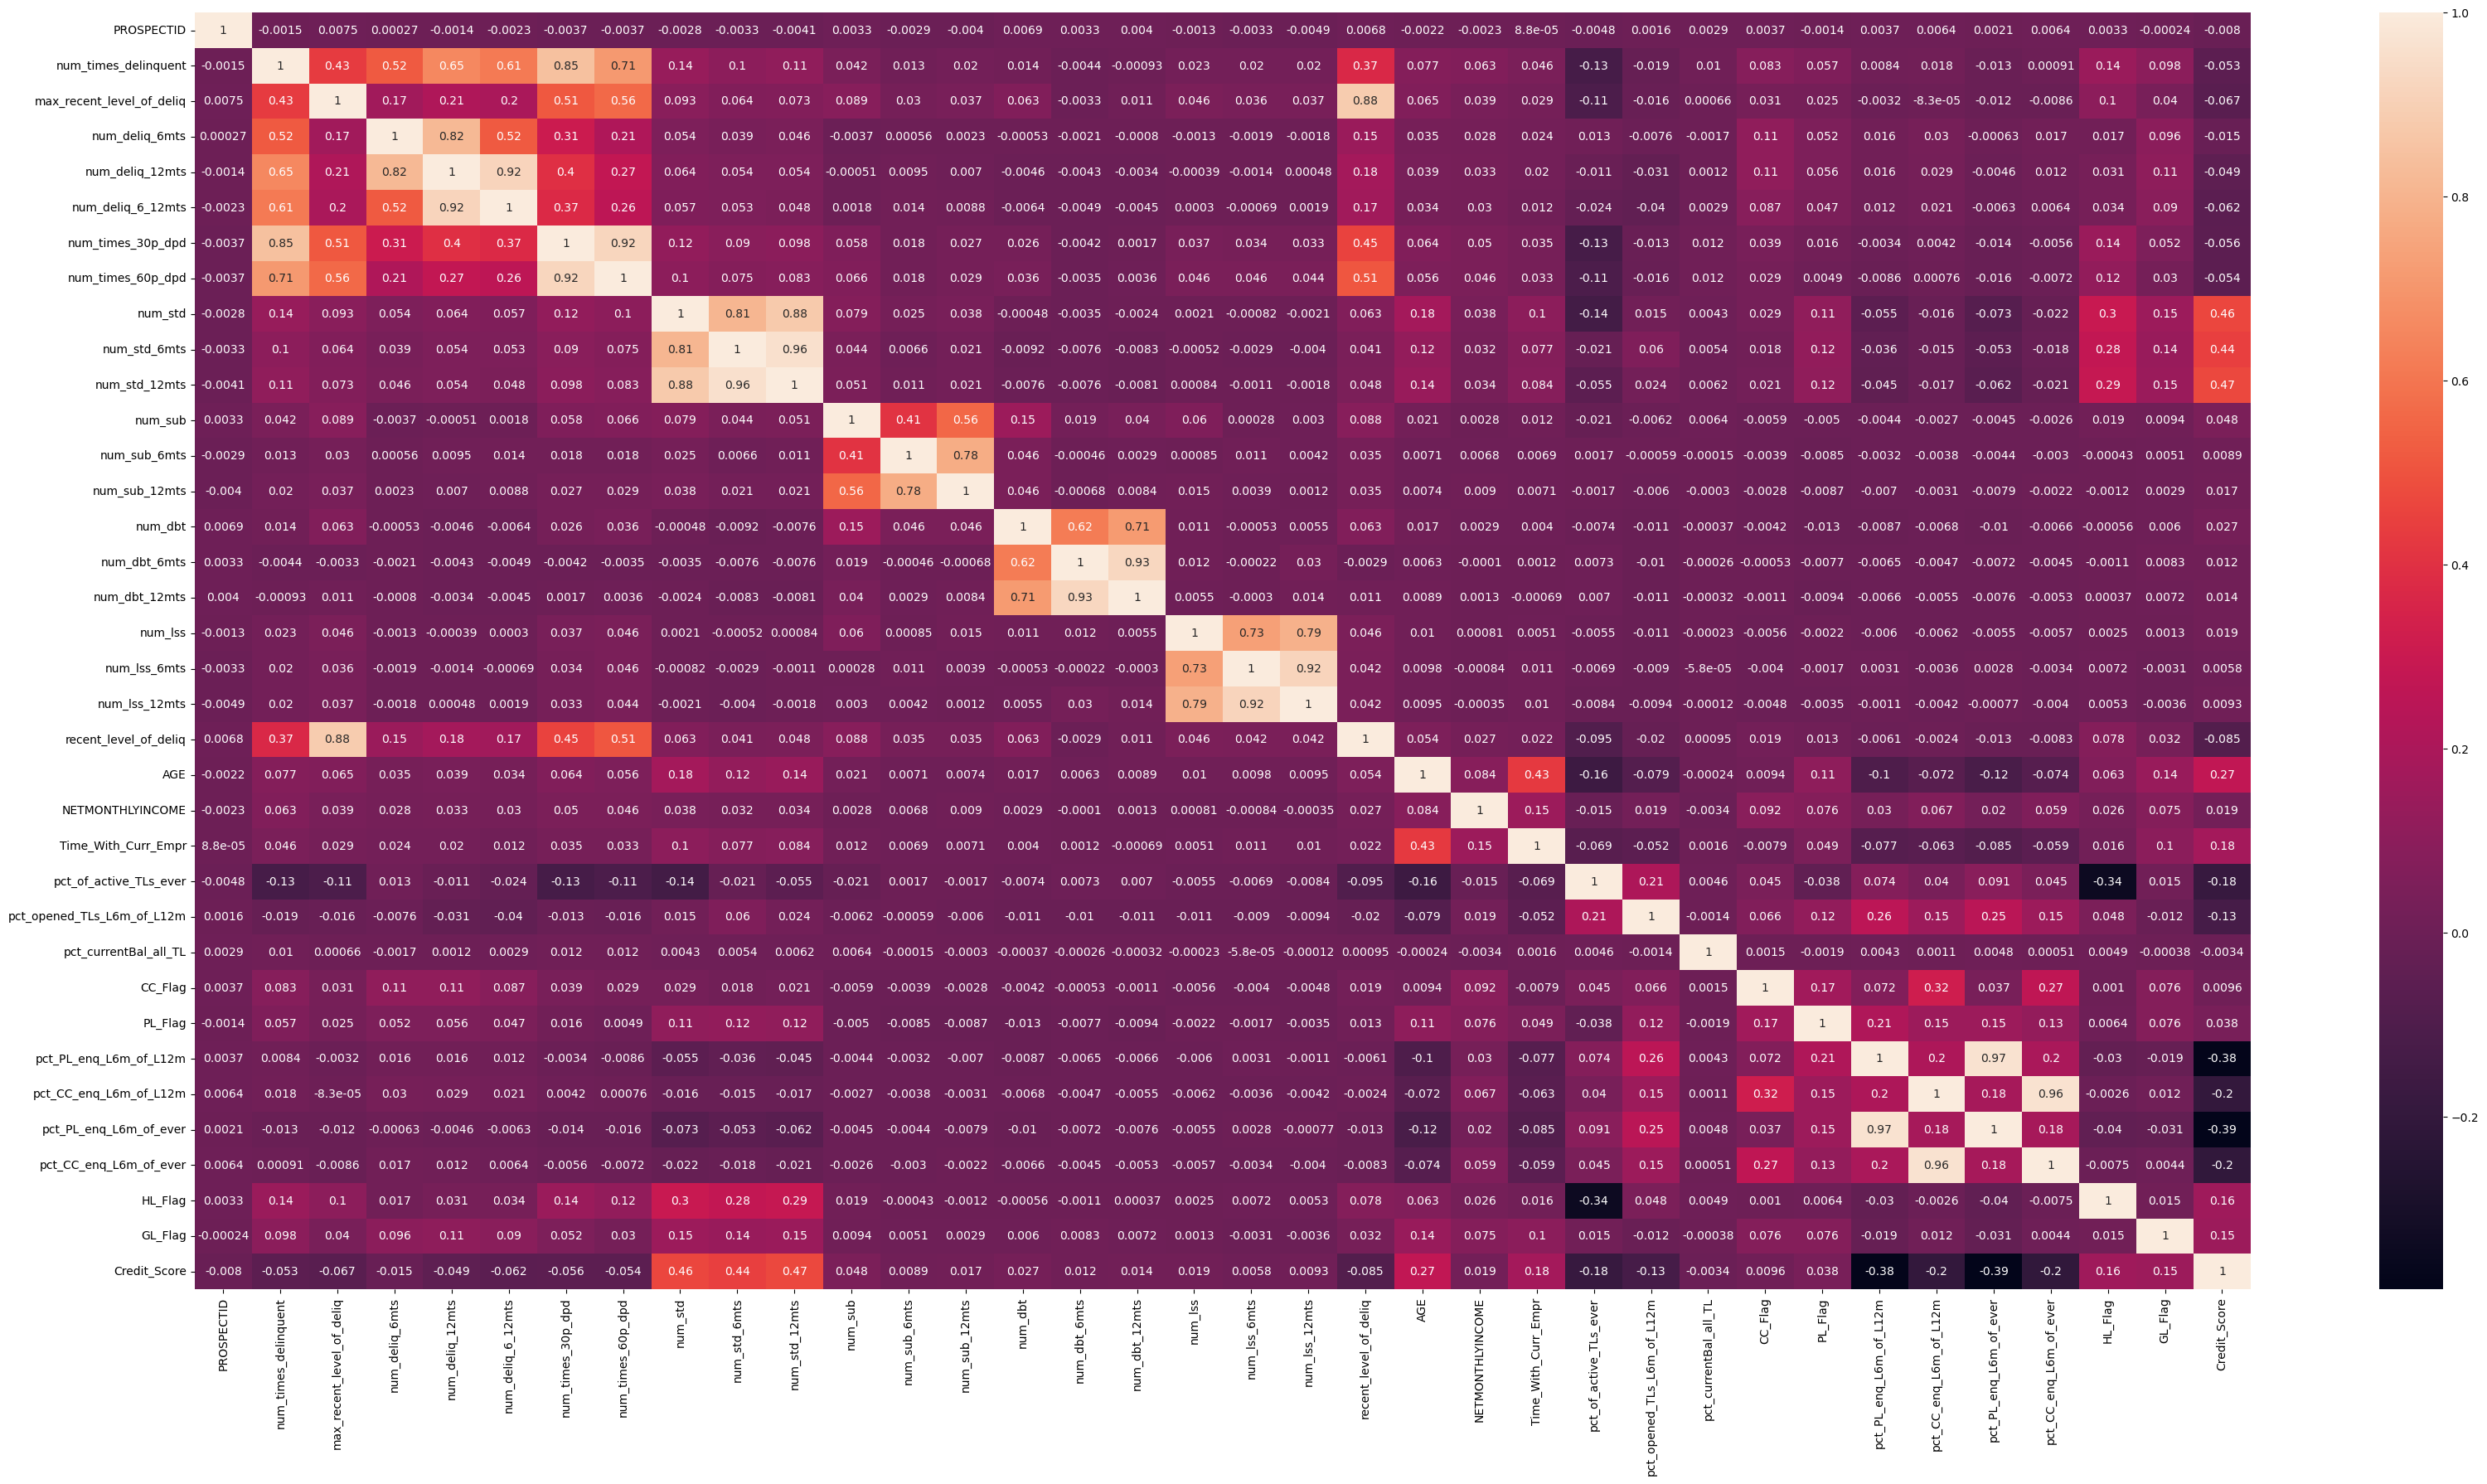

In [71]:
plt.figure(figsize=(40,20))
sns.heatmap(df2_cle.corr(),annot=True)
plt.show()

In [72]:
df2_cle.describe().transpose()

count          mean           std    min  \
PROSPECTID                  51336.0  25668.500000  14819.571046    1.0   
num_times_delinquent        51336.0      1.573749      4.165012    0.0   
max_recent_level_of_deliq   51336.0     13.521953     53.336976    0.0   
num_deliq_6mts              51336.0      0.184977      0.710240    0.0   
num_deliq_12mts             51336.0      0.480053      1.522210    0.0   
num_deliq_6_12mts           51336.0      0.295076      1.027471    0.0   
num_times_30p_dpd           51336.0      0.728884      2.762120    0.0   
num_times_60p_dpd           51336.0      0.426971      2.101404    0.0   
num_std                     51336.0      9.204671     21.308881    0.0   
num_std_6mts                51336.0      1.484027      3.364581    0.0   
num_std_12mts               51336.0      3.319444      7.518414    0.0   
num_sub                     51336.0      0.062646      0.801218    0.0   
num_sub_6mts                51336.0      0.002435      0.091383    0.0   
num_sub_12mts               51336.0      0.009292      0.233403    0.0   
num_dbt                     51336.0      0.025947      0.635611    0.0   
num_dbt_6mts                51336.0      0.001208      0.070331    0.0   
num_dbt_12mts               51336.0      0.004130      0.179885    0.0   
num_lss                     51336.0      0.015097      0.529730    0.0   
num_lss_6mts                51336.0      0.000974      0.075413    0.0   
num_lss_12mts               51336.0      0.002844      0.185349    0.0   
recent_level_of_deliq       51336.0     11.266090     46.100309    0.0   
AGE                         51336.0     33.758532      8.816364   21.0   
NETMONTHLYINCOME            51336.0  26424.185640  20027.108841    0.0   
Time_With_Curr_Empr         51336.0    110.707846     76.046831    0.0   
pct_of_active_TLs_ever      51336.0      0.577542      0.379867    0.0   
pct_opened_TLs_L6m_of_L12m  51336.0      0.302955      0.406049    0.0   
pct_currentBal_all_TL       51264.0      0.836152     36.828156    0.0   
CC_Flag                     51336.0      0.089469      0.285423    0.0   
PL_Flag                     51336.0      0.167874      0.373758    0.0   
pct_PL_enq_L6m_of_L12m      51336.0      0.190414      0.376218    0.0   
pct_CC_enq_L6m_of_L12m      51336.0      0.065182      0.235706    0.0   
pct_PL_enq_L6m_of_ever      51336.0      0.170492      0.350209    0.0   
pct_CC_enq_L6m_of_ever      51336.0      0.056302      0.213506    0.0   
HL_Flag                     51336.0      0.271116      0.444540    0.0   
GL_Flag                     51336.0      0.052887      0.223810    0.0   
Credit_Score                51336.0    679.859222     20.502764  469.0   

                                  25%        50%        75%        max  
PROSPECTID                  12834.750  25668.500  38502.250    51336.0  
num_times_delinquent            0.000      0.000      1.000       74.0  
max_recent_level_of_deliq       0.000      0.000     10.000      900.0  
num_deliq_6mts                  0.000      0.000      0.000       12.0  
num_deliq_12mts                 0.000      0.000      0.000       28.0  
num_deliq_6_12mts               0.000      0.000      0.000       20.0  
num_times_30p_dpd               0.000      0.000      0.000       60.0  
num_times_60p_dpd               0.000      0.000      0.000       52.0  
num_std                         0.000      0.000      9.000      422.0  
num_std_6mts                    0.000      0.000      1.000       60.0  
num_std_12mts                   0.000      0.000      3.000      122.0  
num_sub                         0.000      0.000      0.000       42.0  
num_sub_6mts                    0.000      0.000      0.000        8.0  
num_sub_12mts                   0.000      0.000      0.000       20.0  
num_dbt                         0.000      0.000      0.000       35.0  
num_dbt_6mts                    0.000      0.000      0.000        6.0  
num_dbt_12mts                   0.000      0.000  

## Assess the extent of outliers and address them

In [73]:
df2_cle.skew()

PROSPECTID                      0.000000
num_times_delinquent            4.941857
max_recent_level_of_deliq      11.165553
num_deliq_6mts                  5.255911
num_deliq_12mts                 4.886139
num_deliq_6_12mts               4.908567
num_times_30p_dpd               6.882936
num_times_60p_dpd               8.493916
num_std                         4.663810
num_std_6mts                    4.042617
num_std_12mts                   4.142262
num_sub                        22.059452
num_sub_6mts                   47.834258
num_sub_12mts                  39.698117
num_dbt                        32.790791
num_dbt_6mts                   61.209257
num_dbt_12mts                  51.182907
num_lss                        71.504608
num_lss_6mts                  106.337573
num_lss_12mts                 105.874785
recent_level_of_deliq          12.841617
AGE                             0.767589
NETMONTHLYINCOME               42.199682
Time_With_Curr_Empr             1.808460
pct_of_active_TL

<Axes: xlabel='PROSPECTID', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of PROSPECTID')

Text(0.5, 0, 'PROSPECTID')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='num_times_delinquent', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of num_times_delinquent')

Text(0.5, 0, 'num_times_delinquent')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='max_recent_level_of_deliq', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of max_recent_level_of_deliq')

Text(0.5, 0, 'max_recent_level_of_deliq')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='num_deliq_6mts', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of num_deliq_6mts')

Text(0.5, 0, 'num_deliq_6mts')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='num_deliq_12mts', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of num_deliq_12mts')

Text(0.5, 0, 'num_deliq_12mts')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='num_deliq_6_12mts', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of num_deliq_6_12mts')

Text(0.5, 0, 'num_deliq_6_12mts')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='num_times_30p_dpd', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of num_times_30p_dpd')

Text(0.5, 0, 'num_times_30p_dpd')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='num_times_60p_dpd', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of num_times_60p_dpd')

Text(0.5, 0, 'num_times_60p_dpd')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='num_std', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of num_std')

Text(0.5, 0, 'num_std')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='num_std_6mts', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of num_std_6mts')

Text(0.5, 0, 'num_std_6mts')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='num_std_12mts', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of num_std_12mts')

Text(0.5, 0, 'num_std_12mts')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='num_sub', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of num_sub')

Text(0.5, 0, 'num_sub')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='num_sub_6mts', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of num_sub_6mts')

Text(0.5, 0, 'num_sub_6mts')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='num_sub_12mts', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of num_sub_12mts')

Text(0.5, 0, 'num_sub_12mts')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='num_dbt', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of num_dbt')

Text(0.5, 0, 'num_dbt')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='num_dbt_6mts', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of num_dbt_6mts')

Text(0.5, 0, 'num_dbt_6mts')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='num_dbt_12mts', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of num_dbt_12mts')

Text(0.5, 0, 'num_dbt_12mts')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='num_lss', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of num_lss')

Text(0.5, 0, 'num_lss')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='num_lss_6mts', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of num_lss_6mts')

Text(0.5, 0, 'num_lss_6mts')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='num_lss_12mts', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of num_lss_12mts')

Text(0.5, 0, 'num_lss_12mts')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='recent_level_of_deliq', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of recent_level_of_deliq')

Text(0.5, 0, 'recent_level_of_deliq')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='AGE', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of AGE')

Text(0.5, 0, 'AGE')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='NETMONTHLYINCOME', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of NETMONTHLYINCOME')

Text(0.5, 0, 'NETMONTHLYINCOME')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Time_With_Curr_Empr', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Time_With_Curr_Empr')

Text(0.5, 0, 'Time_With_Curr_Empr')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='pct_of_active_TLs_ever', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of pct_of_active_TLs_ever')

Text(0.5, 0, 'pct_of_active_TLs_ever')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='pct_opened_TLs_L6m_of_L12m', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of pct_opened_TLs_L6m_of_L12m')

Text(0.5, 0, 'pct_opened_TLs_L6m_of_L12m')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='pct_currentBal_all_TL', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of pct_currentBal_all_TL')

Text(0.5, 0, 'pct_currentBal_all_TL')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='CC_Flag', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of CC_Flag')

Text(0.5, 0, 'CC_Flag')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='PL_Flag', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of PL_Flag')

Text(0.5, 0, 'PL_Flag')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='pct_PL_enq_L6m_of_L12m', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of pct_PL_enq_L6m_of_L12m')

Text(0.5, 0, 'pct_PL_enq_L6m_of_L12m')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='pct_CC_enq_L6m_of_L12m', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of pct_CC_enq_L6m_of_L12m')

Text(0.5, 0, 'pct_CC_enq_L6m_of_L12m')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='pct_PL_enq_L6m_of_ever', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of pct_PL_enq_L6m_of_ever')

Text(0.5, 0, 'pct_PL_enq_L6m_of_ever')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='pct_CC_enq_L6m_of_ever', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of pct_CC_enq_L6m_of_ever')

Text(0.5, 0, 'pct_CC_enq_L6m_of_ever')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='HL_Flag', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of HL_Flag')

Text(0.5, 0, 'HL_Flag')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='GL_Flag', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of GL_Flag')

Text(0.5, 0, 'GL_Flag')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Credit_Score', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Credit_Score')

Text(0.5, 0, 'Credit_Score')

Text(0, 0.5, 'Frequency')

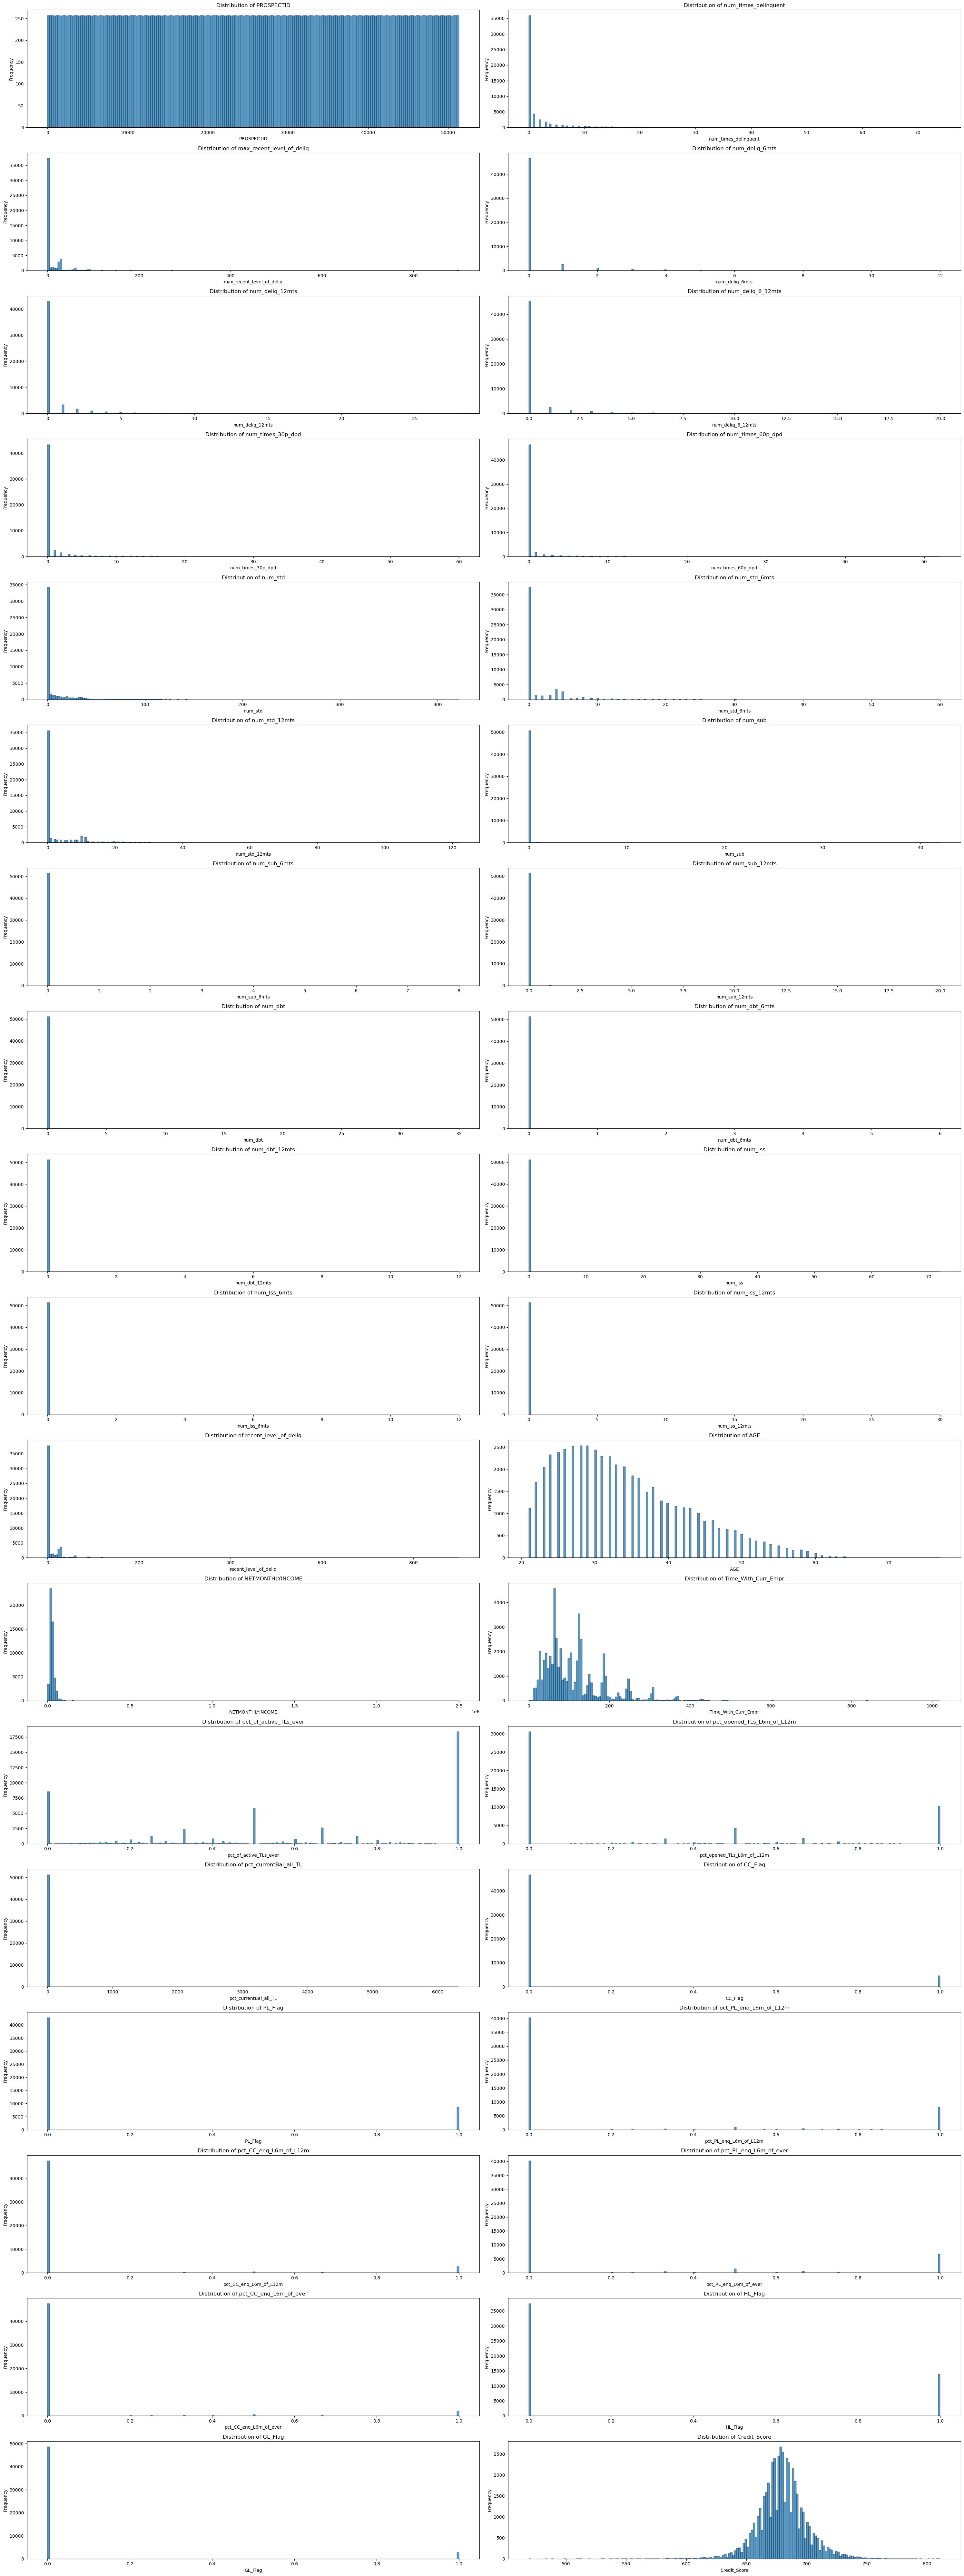

In [74]:
columns_to_plot = df2_cle.select_dtypes(include=['number']).columns

# Create a 18x2 subplot
fig, axes = plt.subplots(len(columns_to_plot)//2, 2, figsize=(30, 80))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot histograms for each column
for i, col in enumerate(columns_to_plot):
    sns.histplot(df2_cle[col], ax=axes[i], bins=200, kde=False)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust the layout
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

<Axes: >

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, 'PROSPECTID'),
  Text(1, 0, 'num_times_delinquent'),
  Text(2, 0, 'max_recent_level_of_deliq'),
  Text(3, 0, 'num_deliq_6mts'),
  Text(4, 0, 'num_deliq_12mts'),
  Text(5, 0, 'num_deliq_6_12mts'),
  Text(6, 0, 'num_times_30p_dpd'),
  Text(7, 0, 'num_times_60p_dpd'),
  Text(8, 0, 'num_std'),
  Text(9, 0, 'num_std_6mts'),
  Text(10, 0, 'num_std_12mts'),
  Text(11, 0, 'num_sub'),
  Text(12, 0, 'num_sub_6mts'),
  Text(13, 0, 'num_sub_12mts'),
  Text(14, 0, 'num_dbt'),
  Text(15, 0, 'num_dbt_6mts'),
  Text(16, 0, 'num_dbt_12mts'),
  Text(17, 0, 'num_lss'),
  Text(18, 0, 'num_lss_6mts'),
  Text(19, 0, 'num_lss_12mts'),
  Text(20, 0, 'recent_level_of_deliq'),
  Text(21, 0, 'AGE'),
  Text(22, 0, 'NETMONTHLYINCOME'),
  Text(23, 0, 'Time_With_Curr_Empr'),
  Text(24, 0, 'pct_of_active_TLs_ever'),
  Text(25, 0, 'pct_op

Text(0.5, 1.0, 'Boxplots of Numerical Variables')

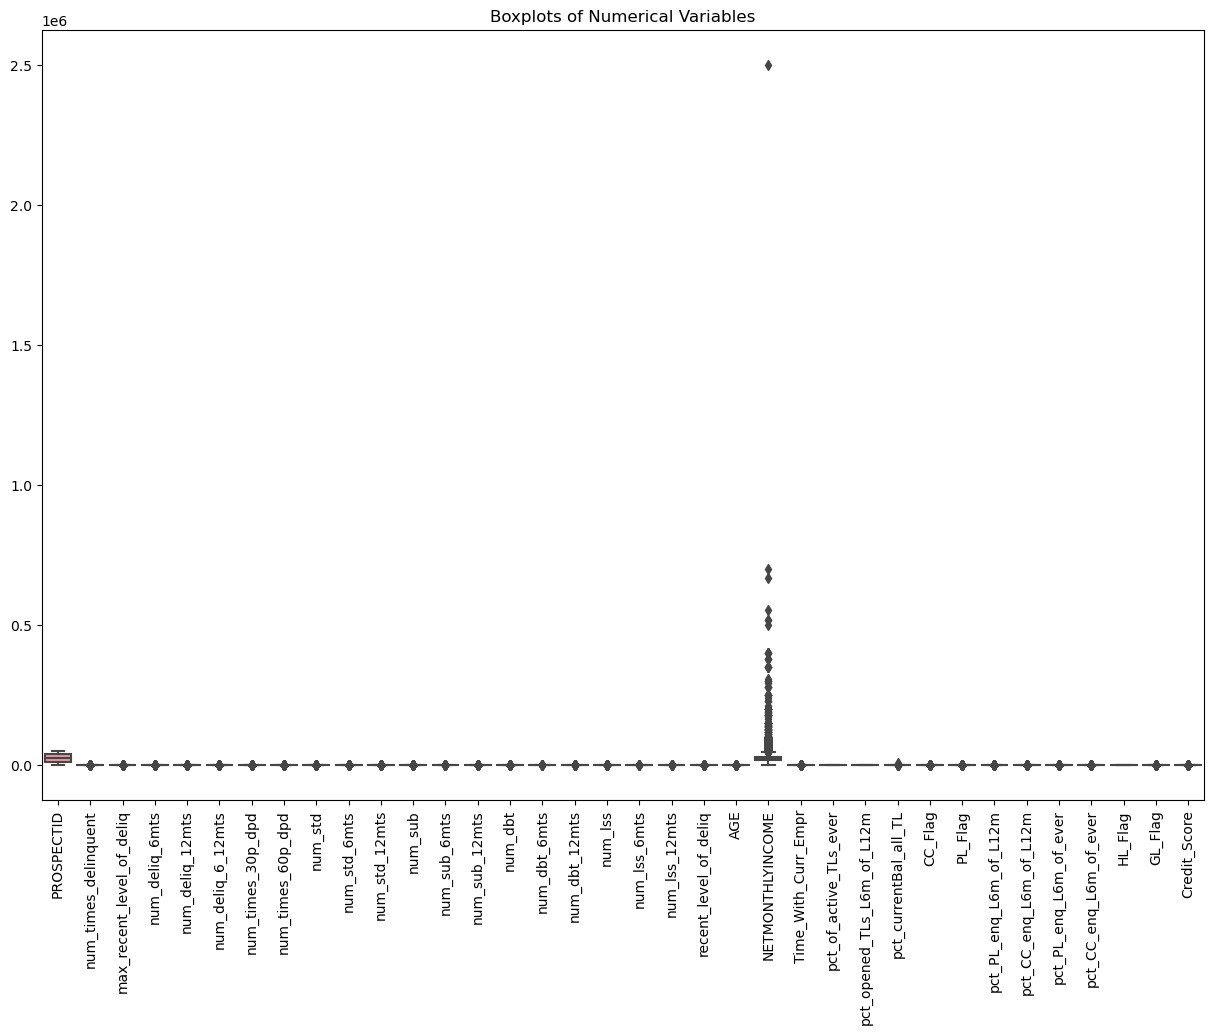

In [79]:
numeric_df2= df2_cle.select_dtypes(include=['number'])
plt.figure(figsize=(15, 10))
sns.boxplot(data=numeric_df2)
plt.xticks(rotation=90)
plt.title('Boxplots of Unscaled Numerical Variables')
plt.show()

## Log Transformation

In [76]:
def log_transformation (df, id_column):
    # Separate the numeric columns and categorical columns
    numeric_cols = df.select_dtypes(include=['number']).columns
    categorical_cols = df.select_dtypes(exclude=['number']).columns
    
    # Exclude the ID column from the numeric columns to transform
    numeric_cols_to_transform = [col for col in numeric_cols if col != id_column]
    
    # Apply log transformation to the numeric columns (excluding the ID column)
    df_numeric_transformed = df[numeric_cols_to_transform].apply(np.log1p)
    
    # Combine the transformed numeric columns, ID column, and categorical columns
    df_transformed = pd.concat([
        df[id_column],               # ID column
        df_numeric_transformed,      # Log-transformed numeric columns
        df[categorical_cols]         # Categorical columns
    ], axis=1)
    
    return df_transformed

In [77]:
df2_log= log_transformation(df2_cle, 'PROSPECTID')

In [90]:
def boxplot(df):
    numeric_df= df.select_dtypes(include=['number'])
    numeric_df= numeric_df.drop(['PROSPECTID'], axis= 1)
    plt.figure(figsize=(15, 10))
    sns.boxplot(data=numeric_df)
    plt.xticks(rotation=90)
    plt.title('Boxplots of Numerical Variables on a Log Scale')
    plt.show()
    

In [91]:
df2_log.skew()

PROSPECTID                     0.000000
num_times_delinquent           1.753239
max_recent_level_of_deliq      1.249541
num_deliq_6mts                 3.576705
num_deliq_12mts                2.658948
num_deliq_6_12mts              3.111586
num_times_30p_dpd              2.907739
num_times_60p_dpd              3.997869
num_std                        1.020281
num_std_6mts                   1.452497
num_std_12mts                  1.277805
num_sub                       11.078768
num_sub_6mts                  37.203750
num_sub_12mts                 23.327041
num_dbt                       21.790444
num_dbt_6mts                  57.862270
num_dbt_12mts                 41.811522
num_lss                       27.862263
num_lss_6mts                  72.832317
num_lss_12mts                 56.350392
recent_level_of_deliq          1.278403
AGE                            0.298696
NETMONTHLYINCOME              -6.614985
Time_With_Curr_Empr           -0.235872
pct_of_active_TLs_ever        -0.445967


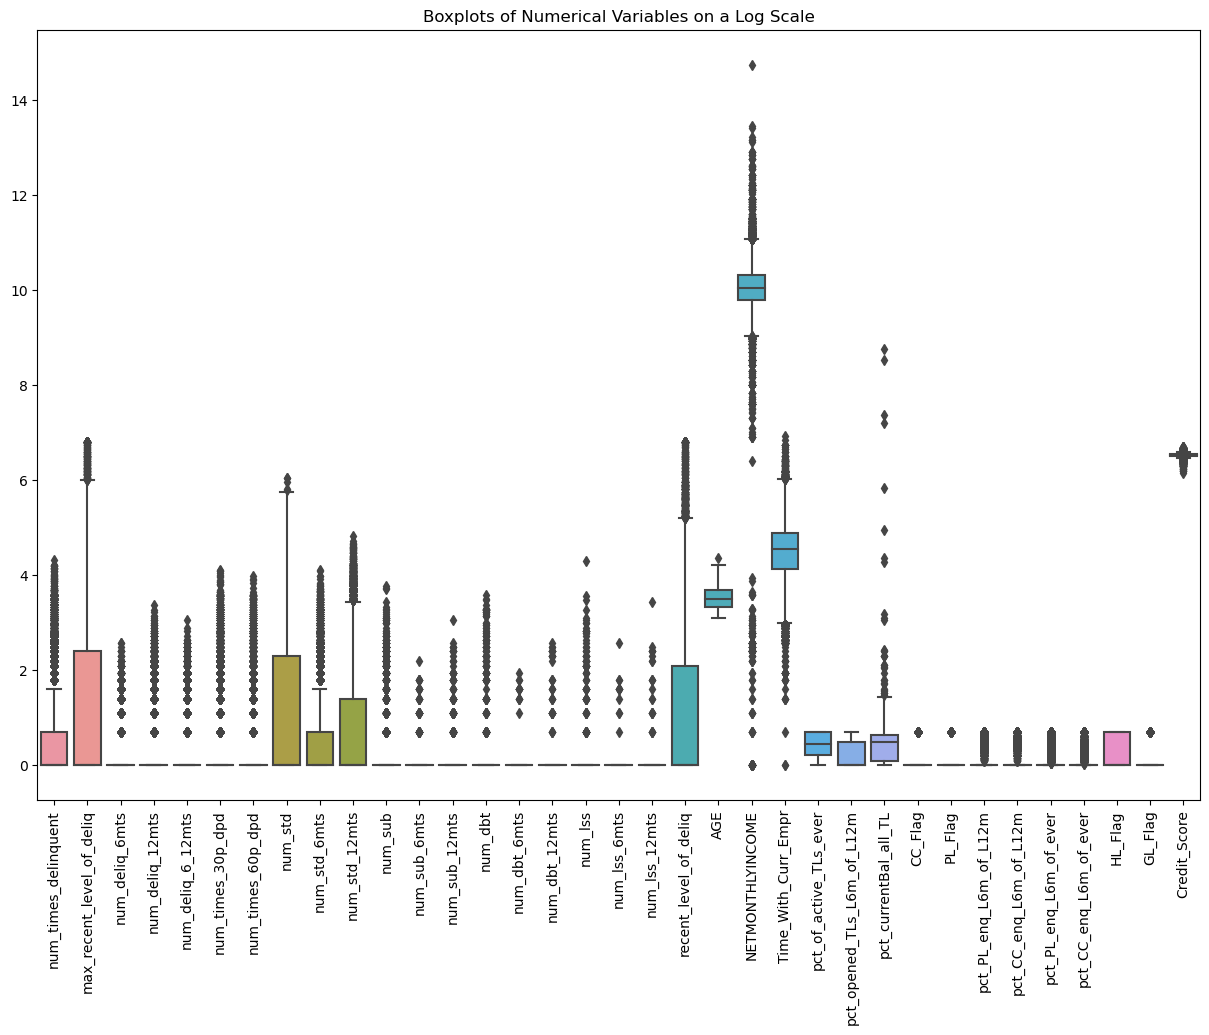

In [92]:
boxplot(df2_log)

# Model Building

Choosing a good baseline model is crucial for setting a reference point for the performance of more complex models. As our first baseline model, we will use **Logistic Regression**. </br>

In a logistic regression model for a multi-class classification problem, we can use methods such as One-vs-Rest (OvR) and Softmax (Multinomial) logistic regression. 

1. **One-vs-Rest (OvR)**:
This method involves training a separate binary classifier for each class.
Each classifier predicts whether a sample belongs to its class or not.
During prediction, the class with the highest probability is chosen.

2. **Softmax (Multinomial):**
This method extends logistic regression to predict probabilities for each class using the softmax function.
It handles multi-class classification natively by estimating the probabilities of each class directly.

In [96]:
# merge the internal and external datasets
merged_df = pd.merge(df1_log, df2_log, on='PROSPECTID')

merged_df.head()
merged_df.shape

Total_TL  Tot_Closed_TL  Tot_Active_TL  Total_TL_opened_L6M  \
0  1.791759       1.609438       0.693147             0.000000   
1  0.693147       0.000000       0.693147             0.000000   
2  2.197225       0.000000       2.197225             0.693147   
3  0.693147       0.000000       0.693147             0.693147   
4  1.386294       1.098612       0.693147             0.000000   

   Tot_TL_closed_L6M  pct_tl_open_L6M  pct_tl_closed_L6M  pct_active_tl  \
0                0.0         0.000000                0.0       0.182322   
1                0.0         0.000000                0.0       0.693147   
2                0.0         0.117783                0.0       0.693147   
3                0.0         0.693147                0.0       0.693147   
4                0.0         0.000000                0.0       0.287432   

   pct_closed_tl  Total_TL_opened_L12M  Tot_TL_closed_L12M  pct_tl_open_L12M  \
0       0.587787              0.000000                 0.0          0.000000   
1       0.000000              0.693147                 0.0          0.693147   
2       0.000000              1.098612                 0.0          0.223144   
3       0.000000              0.693147                 0.0          0.693147   
4       0.511026              0.000000                 0.0          0.000000   

   pct_tl_closed_L12M  Tot_Missed_Pmnt   Auto_TL  CC_TL  Consumer_TL  \
0                 0.0         0.000000  0.000000    0.0     0.000000   
1                 0.0         0.000000  0.000000    0.0     0.693147   
2                 0.0         0.693147  0.693147    0.0     1.945910   
3                 0.0         0.693147  0.000000    0.0     0.000000   
4                 0.0         0.000000  0.693147    0.0     0.000000   

    Gold_TL  Home_TL     PL_TL  Secured_TL  Unsecured_TL  Other_TL  \
0  0.693147      0.0  1.609438    0.693147      1.609438  0.000000   
1  0.000000      0.0  0.000000    0.000000      0.693147  0.000000   
2  0.693147      0.0  0.000000    1.098612      1.945910  0.000000   
3  0.000000      0.0  0.000000    0.000000      0.693147  0.693147   
4  0.000000      0.0  0.000000    1.386294      0.000000  1.098612   

   Age_Oldest_TL  Age_Newest_TL  Account_Tenure  PROSPECTID  \
0       4.290459       2.944439        1.346020           1   
1       2.079442       2.079442        0.000000           2   
2       3.871201       1.098612        2.772589           3   
3       1.791759       1.791759        0.000000           4   
4       4.882802       3.496508        1.386294           5   

   num_times_delinquent  max_recent_level_of_deliq  num_deliq_6mts  \
0              2.484907                   3.401197        0.000000   
1              0.000000                   0.000000        0.000000   
2              2.302585                   3.258097        0.693147   
3              0.000000                   0.000000        0.000000   
4              0.000000                   0.000000        0.000000   

   num_deliq_12mts  num_deliq_6_12mts  num_times_30p_dpd  num_times_60p_dpd  \
0         0.000000           0.000000                0.0                0.0   
1         0.000000           0.000000                0.0                0.0   
2         2.302585           2.197225                0.0                0.0   
3         0.000000           0.000000                0.0                0.0   
4         0.000000           0.000000                0.0                0.0   

    num_std  num_std_6mts  num_std_12mts  num_sub  num_sub_6mts  \
0  3.091042      1.791759       2.484907      0.0           0.0   
1  0.000000      0.000000       0.000000      0.0           0.0   
2  2.397895      1.791759       2.397895      0.0           0.0   
3  1.791759      1.609438       1.791759      0.0           0.0   
4  3.988984      1.609438       2.833213      0.0           0.0   

   num_sub_12mts  num_dbt  num_dbt_6mts  num_dbt_12mts  num_lss  num_lss_6mts  \
0            0.0      0.0           0.0            0.0      0

(51296, 68)

We will use two methods to to encode the categorical variables: </br>
1. One-Hot Encoding: For nominal Variables (no intrinsic order)
2. Label Encoding: For Ordinal Variables (have a meaningful order)

In [114]:
le = LabelEncoder()
merged_df['EDUCATION'] = le.fit_transform(merged_df['EDUCATION'])

# One-Hot Encode categorical variables
df_encoded = pd.get_dummies(merged_df, \
                            columns=['MARITALSTATUS','GENDER', 'last_prod_enq2', 'first_prod_enq2'])

In [117]:
X = df_encoded.drop('Approved_Flag', axis=1)
y = df_encoded.loc[:, 'Approved_Flag']

In [125]:
X= X.dropna(axis=1)

In [131]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model with OvR strategy
model_ovr = LogisticRegression(multi_class='ovr', max_iter=1000, solver='liblinear')
model_ovr.fit(X_train, y_train)

# Predict and evaluate
y_pred_ovr = model_ovr.predict(X_test)


precision = precision_score(y_test, y_pred_ovr, average='weighted') 
recall = recall_score(y_test, y_pred_ovr, average='weighted')        
f1 = f1_score(y_test, y_pred_ovr, average='weighted') 

print(f'One-vs-Rest (OvR) Logistic Regression precision: {precision:.2f}')
print(f'One-vs-Rest (OvR) Logistic Regression recall: {recall:.2f}')
print(f'One-vs-Rest (OvR) Logistic Regression f1: {f1:.2f}')

LogisticRegression(max_iter=1000, multi_class='ovr', solver='liblinear')

One-vs-Rest (OvR) Logistic Regression precision: 0.56
One-vs-Rest (OvR) Logistic Regression recall: 0.66
One-vs-Rest (OvR) Logistic Regression f1: 0.56


In [132]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_ovr)

In [133]:
conf_matrix

array([[ 344,  796,    0,    5],
       [  53, 6453,    0,   14],
       [  12, 1447,    0,   12],
       [   2, 1098,    0,   24]])

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 36.72222222222221, 'Predicted')

Text(70.72222222222221, 0.5, 'Actual')

Text(0.5, 1.0, 'Confusion Matrix')

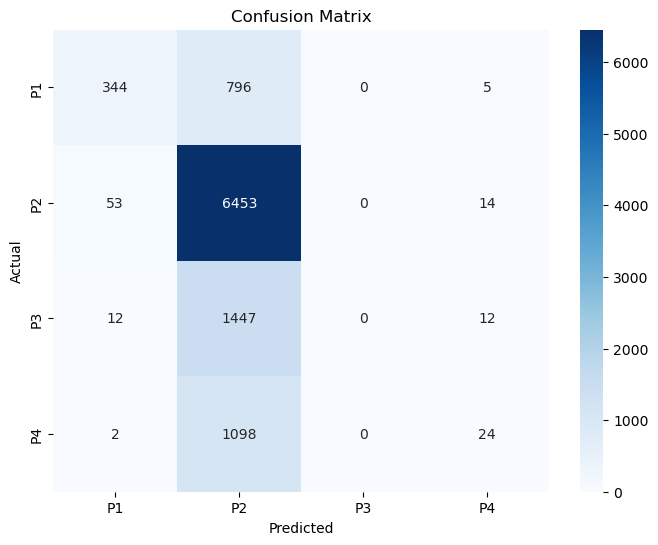

In [134]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', \
            cmap='Blues', xticklabels=['P1', 'P2', 'P3','P4'], yticklabels=['P1', 'P2', 'P3','P4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [139]:
from sklearn.tree import DecisionTreeClassifier

# Create and train a Decision Tree model
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

# Predict and evaluate
accuracy_tree = model_tree.score(X_test, y_test)
print(f'Decision Tree Accuracy: {accuracy_tree:.2f}')

DecisionTreeClassifier()

Decision Tree Accuracy: 1.00


In [140]:
y_pred_tree = model_tree.predict(X_test)

In [141]:
precision_tree = precision_score(y_test, y_pred_tree, average='macro')
recall_tree = recall_score(y_test, y_pred_tree, average='macro')
f1_tree = f1_score(y_test, y_pred_tree, average='macro')

In [142]:
print(f'Decision Tree Precison: {precision_tree:.2f}')
print(f'Decision Tree Recall: {recall_tree:.2f}')
print(f'Decision Tree F1 score: {f1_tree:.2f}')


Decision Tree Precison: 1.00
Decision Tree Recall: 1.00
Decision Tree F1 score: 1.00


In [145]:
matrix= confusion_matrix(y_test, y_pred_tree)

print(matrix)

[[1145    0    0    0]
 [   0 6520    0    0]
 [   0    0 1471    0]
 [   0    0    0 1124]]


<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 36.72222222222221, 'Predicted')

Text(70.72222222222221, 0.5, 'Actual')

Text(0.5, 1.0, 'Confusion Matrix for Decision Tree')

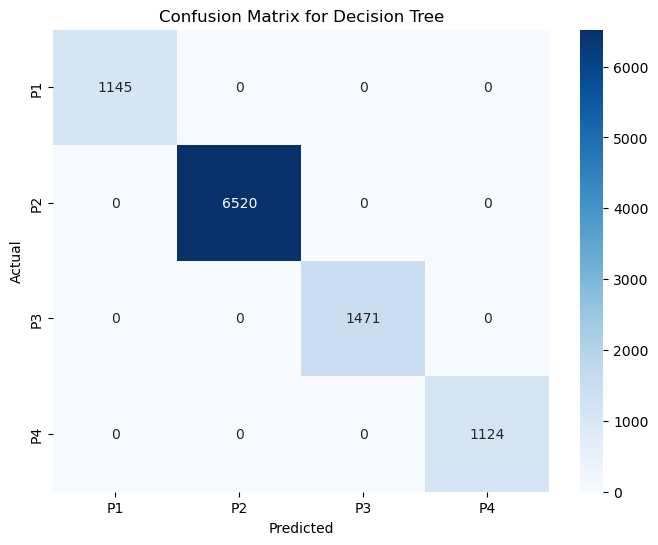

In [146]:
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', \
            cmap='Blues', xticklabels=['P1', 'P2', 'P3','P4'], yticklabels=['P1', 'P2', 'P3','P4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()
